## Load libraries 

# pip install dask distributed

In [1]:
pip install dask distributed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2024.8.1
    Uninstalling dask-2024.8.1:
      Successfully uninstalled dask-2024.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.1.11 requires dask==2024.8.1, but you have dask 2024.9.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os
print(os.listdir("../input"))
from dask.distributed import Client
import plotly.graph_objs as go
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import plotly.graph_objs as go
import plotly.offline as py

['microsoft-malware-prediction']


In [3]:


dtype = {
    'IsBeta':'int8', 
    'IsSxsPassiveMode':'int8',
    'HasTpm':'int8',
    'AutoSampleOptIn':'int8',
    'Census_HasOpticalDiskDrive':'int8',
    'Census_IsPortableOperatingSystem':'int8',
    'Census_IsSecureBootEnabled':'int8',
    'Census_IsTouchEnabled':'int8',
    'Census_IsPenCapable':'int8',
    'HasDetections':'int8',
    'CountryIdentifier':'int16',
    'LocaleEnglishNameIdentifier':'int16',
    'OsBuild':'int16',
    'OsSuite':'int16',
    'Census_OSBuildNumber':'int16',
    'Census_OSUILocaleIdentifier':'int16',
    'Census_OSBuildRevision':'int32',
    'RtpStateBitfield':'float64',
    'DefaultBrowsersIdentifier':'float64',
    'AVProductStatesIdentifier':'float64',
    'AVProductsInstalled':'float64',
    'AVProductsEnabled':'float64',
    'CityIdentifier':'float64',
    'OrganizationIdentifier':'float64',
    'GeoNameIdentifier':'float64',
    'IsProtected':'float64',
    'SMode':'float64',
    'IeVerIdentifier':'float64',
    'Firewall':'float64',
    'UacLuaenable':'float64',
    'Census_OEMNameIdentifier':'float64',
    'Census_OEMModelIdentifier':'float64',
    'Census_ProcessorCoreCount':'float64',
    'Census_ProcessorManufacturerIdentifier':'float64',
    'Census_ProcessorModelIdentifier':'float64',
    'Census_PrimaryDiskTotalCapacity':'float64',
    'Census_SystemVolumeTotalCapacity':'float64',
    'Census_TotalPhysicalRAM':'float64',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches':'float64',
    'Census_InternalPrimaryDisplayResolutionHorizontal':'float64',
    'Census_InternalPrimaryDisplayResolutionVertical':'float64',
    'Census_InternalBatteryNumberOfCharges':'float64',
    'Census_OSInstallLanguageIdentifier':'float64',
    'Census_IsFlightingInternal':'float64',
    'Census_IsFlightsDisabled':'float64',
    'Census_ThresholdOptIn':'float64',
    'Census_FirmwareManufacturerIdentifier':'float64',
    'Census_FirmwareVersionIdentifier':'float64',
    'Census_IsWIMBootEnabled':'float64',
    'Census_IsVirtualDevice':'float64',
    'Census_IsAlwaysOnAlwaysConnectedCapable':'float64',
    'Wdft_IsGamer':'float64',
    'Wdft_RegionIdentifier':'float64',
    'MachineIdentifier':'object',
    'ProductName':'object',
    'EngineVersion':'object',
    'AppVersion':'object',
    'AvSigVersion':'object',
    'Platform':'object',
    'Processor':'object',
    'OsVer':'object',
    'OsPlatformSubRelease':'object',
    'OsBuildLab':'object',
    'SkuEdition':'object',
    'PuaMode':'object',
    'SmartScreen':'object',
    'Census_MDC2FormFactor':'object',
    'Census_DeviceFamily':'object',
    'Census_ProcessorClass':'object',
    'Census_PrimaryDiskTypeName':'object',
    'Census_ChassisTypeName':'object',
    'Census_PowerPlatformRoleName':'object',
    'Census_InternalBatteryType':'object',
    'Census_OSVersion':'object',
    'Census_OSArchitecture':'object',
    'Census_OSBranch':'object',
    'Census_OSEdition':'object',
    'Census_OSSkuName':'object',
    'Census_OSInstallTypeName':'object',
    'Census_OSWUAutoUpdateOptionsName':'object',
    'Census_GenuineStateName':'object',
    'Census_ActivationChannel':'object',
    'Census_FlightRing':'object'
}

data = dd.read_csv('/kaggle/input/microsoft-malware-prediction/train.csv', dtype=dtype)

In [4]:
#  drop cols has more than 60% nulls or has dublicated more than 90%
def drop_cols(train_df):  
    cols_to_delete = [
        'ProductName', 'IsBeta', 'IsSxsPassiveMode', 'HasTpm', 
        'AutoSampleOptIn', 'PuaMode', 'UacLuaenable', 'MachineIdentifier',
        'Census_DeviceFamily', 'Census_ProcessorClass','Firewall', 
        'Census_InternalBatteryType', 'Census_IsFlightingInternal', 
        'Census_IsFlightsDisabled', 'Census_FlightRing', 'IsProtected',
        'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'OsVer',
        'Census_IsVirtualDevice', 'Census_IsPenCapable', 'Platform',
        'Census_IsAlwaysOnAlwaysConnectedCapable','RtpStateBitfield','DefaultBrowsersIdentifier'
         ]

    train_df = train_df.drop(columns=cols_to_delete)
    return train_df
data=drop_cols(data).compute()
data.shape


(8921483, 58)

In [5]:
# get randome sample of data
def sample(data,count): 
    total_rows = data.shape[0]
    frac = count / total_rows
    train_df = data.sample(frac=frac, replace=False)
    return train_df


train_df =sample(data,1500000)

In [6]:

import dask.dataframe as dd

int_cols = train_df.select_dtypes(include='int64').columns
train_df[int_cols] = train_df[int_cols].astype('int32')

float_cols = train_df.select_dtypes(include='float64').columns
train_df[float_cols] = train_df[float_cols].astype('float32')

print(train_df.dtypes)


EngineVersion                                         object
AppVersion                                            object
AvSigVersion                                          object
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float32
AVProductsEnabled                                    float32
CountryIdentifier                                      int16
CityIdentifier                                       float32
OrganizationIdentifier                               float32
GeoNameIdentifier                                    float32
LocaleEnglishNameIdentifier                            int16
Processor                                             object
OsBuild                                                int16
OsSuite                                                int16
OsPlatformSubRelease                                  object
OsBuildLab                                            object
SkuEdition              

In [7]:
def reduce_mem_usage(df):

    for col in df.select_dtypes(include=[np.number]).columns:
        col_type = df[col].dtype
        if np.issubdtype(col_type, np.integer):
            # Determine the smallest integer data type that can accommodate the data
            min_value = df[col].min()
            max_value = df[col].max()
            for dtype in [np.int8, np.int16, np.int32, np.int64]:
                if np.iinfo(dtype).min <= min_value and np.iinfo(dtype).max >= max_value:
                    df[col] = df[col].astype(dtype)
                    break

    return df

In [8]:
start_mem = train_df.memory_usage().sum() / 1024**3
print(f"Memory usage of dataframe is {start_mem:.2f} GB")
train = reduce_mem_usage(train_df)
end_mem = train.memory_usage().sum() / 1024**3
print(f"Memory usage after optimization is: {end_mem:.2f} GB")
print(f"Decreased by {(start_mem - end_mem) / start_mem * 100:.1f}%")

Memory usage of dataframe is 0.41 GB
Memory usage after optimization is: 0.41 GB
Decreased by 0.0%


In [9]:

def num_cat_split(data):
    num_cols = list(set(data.describe().columns.to_list()))
    cat_cols= list(set(data.columns.to_list()) - set(num_cols))
    return num_cols,cat_cols

num,cat=num_cat_split(train_df)

In [10]:
# null_count_persent_datatype
def dataframe_summary(df):
    summary = []
    for col in df.columns:
        col_name = col
        null_count = df[col].isnull().sum()
        null_percent = (null_count / len(df)) * 100
        data_type = df[col].dtype
        
        summary.append([col_name, null_count, null_percent, data_type])
    
    summary_df = pd.DataFrame(summary, columns=['Column Name', 'Null Count', 'Null Percentage', 'Data Type'])
    
    return summary_df

nulls=dataframe_summary(train_df)
print(nulls)

                                          Column Name  Null Count  \
0                                       EngineVersion           0   
1                                          AppVersion           0   
2                                        AvSigVersion           0   
3                           AVProductStatesIdentifier        6143   
4                                 AVProductsInstalled        6143   
5                                   AVProductsEnabled        6143   
6                                   CountryIdentifier           0   
7                                      CityIdentifier       54666   
8                              OrganizationIdentifier      462779   
9                                   GeoNameIdentifier          44   
10                        LocaleEnglishNameIdentifier           0   
11                                          Processor           0   
12                                            OsBuild           0   
13                                

In [11]:
train_df.head(10)

EngineVersion        AppVersion  AvSigVersion  \
85497    1.1.15200.1   4.18.1807.18075  1.275.1650.0   
122939   1.1.15000.2   4.10.14393.1794   1.271.767.0   
4911     1.1.15200.1   4.18.1807.18075  1.275.1293.0   
124740   1.1.15200.1   4.18.1807.18075  1.275.1421.0   
65590    1.1.15200.1   4.18.1807.18075   1.275.245.0   
106499   1.1.15200.1  4.14.17639.18041   1.275.146.0   
71619    1.1.15200.1   4.18.1807.18075  1.275.1734.0   
103384   1.1.15200.1   4.18.1807.18075   1.275.500.0   
92386    1.1.15200.1   4.18.1807.18075  1.275.1047.0   
107767   1.1.15100.1   4.18.1806.18062  1.273.1094.0   

        AVProductStatesIdentifier  AVProductsInstalled  AVProductsEnabled  \
85497                     53447.0                  1.0                1.0   
122939                    61027.0                  2.0                2.0   
4911                      53447.0                  1.0                1.0   
124740                    53447.0                  1.0                1.0   
65590                     47238.0                  2.0                1.0   
106499                    53447.0                  1.0                1.0   
71619                      7945.0                  2.0                1.0   
103384                    53447.0                  1.0                1.0   
92386                     53447.0                  1.0                1.0   
107767                    53447.0                  1.0                1.0   

        CountryIdentifier  CityIdentifier  OrganizationIdentifier  \
85497                 214         58607.0                    50.0   
122939                158        117594.0                     NaN   
4911                  179         83348.0                     NaN   
124740                 93         88087.0                    27.0   
65590                 201          4999.0                    48.0   
106499                195         10222.0                    27.0   
71619                  50        115292.0                     NaN   
103384                171         99787.0                    27.0   
92386                  93        146087.0                    27.0   
107767                 22         87917.0                     NaN   

        GeoNameIdentifier  ...  Census_IsPortableOperatingSystem  \
85497               287.0  ...                                 0   
122939              202.0  ...                                 0   
4911                234.0  ...                                 0   
124740              119.0  ...                                 0   
65590               267.0  ...                                 0   
106499              276.0  ...                                 0   
71619                68.0  ...                                 0   
103384              211.0  ...                                 0   
92386               277.0  ...                                 0   
107767              276.0  ...                                 0   

       Census_GenuineStateName  Census_ActivationChannel  \
85497               IS_GENUINE                    OEM:DM   
122939              IS_GENUINE                    OEM:DM   
4911           INVALID_LICENSE               Volume:GVLK   
124740              IS_GENUINE                    Retail   
65590               IS_GENUINE                    OEM:DM   
106499              IS_GENUINE                    Retail   
71619               IS_GENUINE                    OEM:DM   
103384              IS_GENUINE                    Retail   
92386               IS_GENUINE                    Retail   
107767              IS_GENUINE                    Retail   

        Census_FirmwareManufacturerIdentifier  \
85497                                   355.0   
122939                                  142.0   
4911                                    168.0   
124740                                  486.0   
65590                                   142.0   
106499                                  628.0   
71619                        

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500000 entries, 85497 to 71431
Data columns (total 58 columns):
 #   Column                                             Non-Null Count    Dtype  
---  ------                                             --------------    -----  
 0   EngineVersion                                      1500000 non-null  object 
 1   AppVersion                                         1500000 non-null  object 
 2   AvSigVersion                                       1500000 non-null  object 
 3   AVProductStatesIdentifier                          1493857 non-null  float32
 4   AVProductsInstalled                                1493857 non-null  float32
 5   AVProductsEnabled                                  1493857 non-null  float32
 6   CountryIdentifier                                  1500000 non-null  int16  
 7   CityIdentifier                                     1445334 non-null  float32
 8   OrganizationIdentifier                             1037221 non-nu

# funcion ip_errors selet the most founded catigores and replace others with word "other" 

In [13]:
def ip_errors(df):
     
    SkuEdition_accepted=['Home','Pro','Invalid']
    df['SkuEdition'] = df['SkuEdition'].where(df['SkuEdition'].isin(SkuEdition_accepted), 'other')
    
    Census_MDC2FormFactor_accepted=['Notebook','Desktop','Convertible','Detachable','AllInOne','PCOther']
    df['Census_MDC2FormFactor'] = df['Census_MDC2FormFactor'].where(df['Census_MDC2FormFactor'].isin(Census_MDC2FormFactor_accepted), 'other')
    
    Census_OSEdition_accepted = ["Core", "Professional", "CoreSingleLanguage", "CoreCountrySpecific"]
    df['Census_OSEdition'] = df['Census_OSEdition'].where(df['Census_OSEdition'].isin(Census_OSEdition_accepted), 'other')
     
    Census_OSBranch_accepted=['rs4_release','rs3_release','rs3_release_svc_escrow','rs2_release','th2_release','rs1_release','th2_release_sec','th1_st1','th1']
    df['Census_OSBranch'] = df['Census_OSBranch'].where(df['Census_OSBranch'].isin(Census_OSBranch_accepted), 'other')
    
    Census_ChassisTypeName_accepted = ["Notebook", "Desktop", "Laptop", "Portable", "Allinone"]
    df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].where(df['Census_ChassisTypeName'].isin(Census_ChassisTypeName_accepted), 'other')
    
    Census_OSSkuName_accepted = ["CORE", "PROFESSIONAL", "CORE_SINGLELANGUAGE", "CORE_COUNTRYSPECIFIC"]
    train_df['Census_OSSkuName'] = train_df['Census_OSSkuName'].where(train_df['Census_OSSkuName'].isin(Census_OSSkuName_accepted), 'other')
    
    return df

train_df=ip_errors(train_df)

# visualization

In [14]:
def plot_categorical_feature(col, only_bars=False, top_n=10, by_touch=False):
    top_n = top_n if train[col].nunique() > top_n else train[col].nunique()
    print(f"{col} has {train[col].nunique()} unique values and type: {train[col].dtype}.")
    print(train[col].value_counts(normalize=True, dropna=False).head())
    if not by_touch:
        if not only_bars:
            df = train.groupby([col]).agg({'HasDetections': ['count', 'mean']})
            df = df.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
            data = [go.Bar(x=df.index, y=df['HasDetections']['count'].values, name='counts'),
                    go.Scatter(x=df.index, y=df['HasDetections']['mean'], name='Detections rate', yaxis='y2')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories and mean target value",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis2=dict(title='Detections rate', overlaying='y', side='right')),
                           legend=dict(orientation="v"))

        else:
            top_cat = list(train[col].value_counts(dropna=False).index[:top_n])
            df0 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 1), col].value_counts().head(10).sort_index()
            df1 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 0), col].value_counts().head(10).sort_index()
            data = [go.Bar(x=df0.index, y=df0.values, name='Has Detections'),
                    go.Bar(x=df1.index, y=df1.values, name='No Detections')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                ),
                           legend=dict(orientation="v"), barmode='group')
        
        py.iplot(dict(data=data, layout=layout))
        
    else:
        top_n = 10
        top_cat = list(train[col].value_counts(dropna=False).index[:top_n])
        df = train.loc[train[col].isin(top_cat)]

        df1 = train.loc[train['Census_IsTouchEnabled'] == 1]
        df0 = train.loc[train['Census_IsTouchEnabled'] == 0]

        df0_ = df0.groupby([col]).agg({'HasDetections': ['count', 'mean']})
        df0_ = df0_.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
        df1_ = df1.groupby([col]).agg({'HasDetections': ['count', 'mean']})
        df1_ = df1_.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
        data1 = [go.Bar(x=df0_.index, y=df0_['HasDetections']['count'].values, name='Nontouch device counts'),
                go.Scatter(x=df0_.index, y=df0_['HasDetections']['mean'], name='Detections rate for nontouch devices', yaxis='y2')]
        data2 = [go.Bar(x=df1_.index, y=df1_['HasDetections']['count'].values, name='Touch device counts'),
                go.Scatter(x=df1_.index, y=df1_['HasDetections']['mean'], name='Detections rate for touch devices', yaxis='y2')]

        layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories for nontouch devices",
                            xaxis = dict(title = f'{col}',
                                         showgrid=False,
                                         zeroline=False,
                                         showline=False,
                                         type='category'),
                            yaxis = dict(title = 'Counts',
                                         showgrid=False,
                                         zeroline=False,
                                         showline=False,),
                                    yaxis2=dict(title='Detections rate', overlaying='y', side='right'),
                            ),
                       legend=dict(orientation="v"), barmode='group')

        py.iplot(dict(data=data1, layout=layout))
        layout['title'] = f"Counts of {col} by top-{top_n} categories for touch devices"
        py.iplot(dict(data=data2, layout=layout))

In [15]:
for col in cat:
    plot_categorical_feature(col, only_bars=False, top_n=10, by_touch=True)

Census_OSArchitecture has 3 unique values and type: object.
Census_OSArchitecture
amd64    0.908797
x86      0.091159
arm64    0.000044
Name: proportion, dtype: float64


EngineVersion has 61 unique values and type: object.
EngineVersion
1.1.15200.1    0.430613
1.1.15100.1    0.412191
1.1.15000.2    0.029915
1.1.14901.4    0.023888
1.1.14600.4    0.018150
Name: proportion, dtype: float64


Census_PrimaryDiskTypeName has 4 unique values and type: object.
Census_PrimaryDiskTypeName
HDD            0.650835
SSD            0.276453
UNKNOWN        0.039905
Unspecified    0.031344
NaN            0.001463
Name: proportion, dtype: float64


Processor has 3 unique values and type: object.
Processor
x64      0.908746
x86      0.091210
arm64    0.000044
Name: proportion, dtype: float64


Census_OSEdition has 5 unique values and type: object.
Census_OSEdition
Core                   0.388282
Professional           0.351460
CoreSingleLanguage     0.218090
other                  0.023708
CoreCountrySpecific    0.018460
Name: proportion, dtype: float64


AvSigVersion has 7731 unique values and type: object.
AvSigVersion
1.273.1420.0    0.011609
1.263.48.0      0.011034
1.275.1140.0    0.010893
1.275.727.0     0.010395
1.273.371.0     0.009733
Name: proportion, dtype: float64


Census_ChassisTypeName has 5 unique values and type: object.
Census_ChassisTypeName
Notebook    0.588614
Desktop     0.209943
other       0.084431
Laptop      0.076606
Portable    0.040406
Name: proportion, dtype: float64


Census_OSVersion has 350 unique values and type: object.
Census_OSVersion
10.0.17134.228    0.158248
10.0.17134.165    0.101057
10.0.16299.431    0.061459
10.0.17134.285    0.052645
10.0.16299.547    0.038758
Name: proportion, dtype: float64


Census_GenuineStateName has 4 unique values and type: object.
Census_GenuineStateName
IS_GENUINE         0.883134
INVALID_LICENSE    0.089854
OFFLINE            0.025468
UNKNOWN            0.001544
Name: proportion, dtype: float64


Census_MDC2FormFactor has 7 unique values and type: object.
Census_MDC2FormFactor
Notebook       0.641281
Desktop        0.218833
Convertible    0.045478
Detachable     0.033530
AllInOne       0.032845
Name: proportion, dtype: float64


SkuEdition has 4 unique values and type: object.
SkuEdition
Home       0.617228
Pro        0.361993
other      0.011849
Invalid    0.008931
Name: proportion, dtype: float64


Census_OSWUAutoUpdateOptionsName has 6 unique values and type: object.
Census_OSWUAutoUpdateOptionsName
FullAuto                                 0.443359
UNKNOWN                                  0.282293
Notify                                   0.227919
AutoInstallAndRebootAtMaintenanceTime    0.041789
Off                                      0.003013
Name: proportion, dtype: float64


OsBuildLab has 527 unique values and type: object.
OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                 0.409999
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908    0.140733
16299.15.amd64fre.rs3_release.170928-1534                0.107831
15063.0.amd64fre.rs2_release.170317-1834                 0.080145
17134.1.x86fre.rs4_release.180410-1804                   0.028793
Name: proportion, dtype: float64


Census_OSBranch has 10 unique values and type: object.
Census_OSBranch
rs4_release               0.449249
rs3_release               0.138642
rs3_release_svc_escrow    0.134876
rs2_release               0.088997
rs1_release               0.087925
Name: proportion, dtype: float64


Census_ActivationChannel has 6 unique values and type: object.
Census_ActivationChannel
Retail         0.530130
OEM:DM         0.382392
Volume:GVLK    0.050593
OEM:NONSLP     0.035594
Volume:MAK     0.000881
Name: proportion, dtype: float64


SmartScreen has 17 unique values and type: object.
SmartScreen
RequireAdmin    0.484259
NaN             0.356037
ExistsNotSet    0.116976
Off             0.020731
Warn            0.015276
Name: proportion, dtype: float64


Census_OSInstallTypeName has 9 unique values and type: object.
Census_OSInstallTypeName
UUPUpgrade    0.292623
IBSClean      0.184753
Update        0.178631
Upgrade       0.140303
Other         0.094003
Name: proportion, dtype: float64


Census_OSSkuName has 5 unique values and type: object.
Census_OSSkuName
CORE                    0.388275
PROFESSIONAL            0.358000
CORE_SINGLELANGUAGE     0.218043
CORE_COUNTRYSPECIFIC    0.018436
other                   0.017247
Name: proportion, dtype: float64


OsPlatformSubRelease has 9 unique values and type: object.
OsPlatformSubRelease
rs4    0.438826
rs3    0.280933
rs2    0.087183
rs1    0.081715
th2    0.046237
Name: proportion, dtype: float64


AppVersion has 102 unique values and type: object.
AppVersion
4.18.1807.18075    0.575488
4.18.1806.18062    0.095319
4.12.16299.15      0.040486
4.10.209.0         0.030632
4.13.17134.1       0.028954
Name: proportion, dtype: float64


Census_PowerPlatformRoleName has 10 unique values and type: object.
Census_PowerPlatformRoleName
Mobile         0.692927
Desktop        0.231827
Slate          0.055158
Workstation    0.012280
SOHOServer     0.004260
Name: proportion, dtype: float64


In [16]:
# is scketched bar chare in normale barplot added on it target data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_impact(data, target, n=5):
    """
    Visualize the percentage of target (0 and 1) for the top `n` most frequent values in each column,
    with `target == 1` in red and `target == 0` in green, using a stacked bar chart.
    
    Parameters:
    data (pd.DataFrame): The input dataframe.
    target (str): The target column name.
    n (int): The number of most frequent values to consider for each column.
    """
    columns = data.columns.drop(target)
    
    for col in columns:
        # Get the top n most frequent values in the column
        top_n_values = data[col].value_counts().nlargest(n).index
        
        # Filter the data for the top n values
        filtered_data = data[data[col].isin(top_n_values)]
        
        # Create a pivot table to calculate the percentage of target values (0 and 1)
        pivot_table = pd.crosstab(filtered_data[col], filtered_data[target], normalize='index') * 100
        
        # Plot the stacked bar chart
        pivot_table.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))
        
        # Add annotations for the percentage
        for i in range(len(pivot_table)):
            for j, val in enumerate(pivot_table.iloc[i]):
                plt.text(i, pivot_table.iloc[i, :j+1].sum() - (val / 2), f'{val:.1f}%', 
                         ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        
        # Update the title and labels
        plt.title(f'Target Impact on {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel(f'Percentage of {target}', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend([f'{target} = 0', f'{target} = 1'], title=target)
        
        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming 'df' is your DataFrame and 'HasDetections' is your target column
# plot_feature_impact(df, 'HasDetections', n=5)


In [17]:
cat.append('HasDetections')

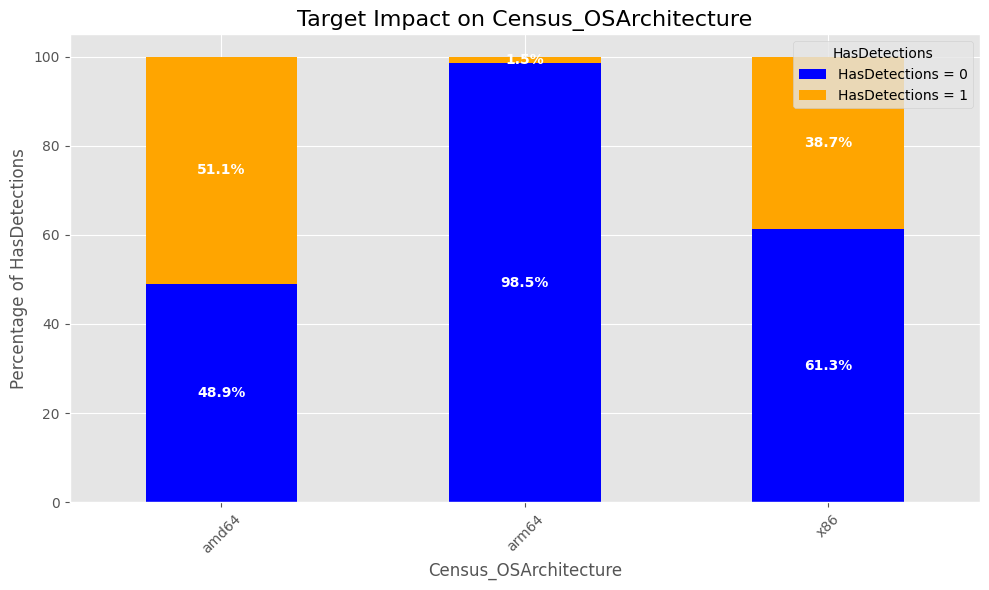

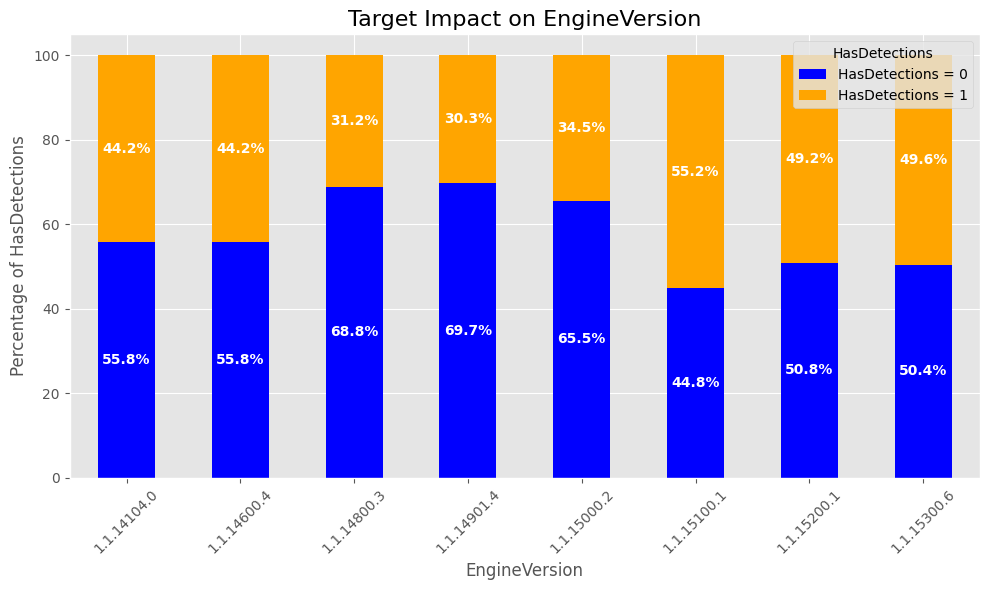

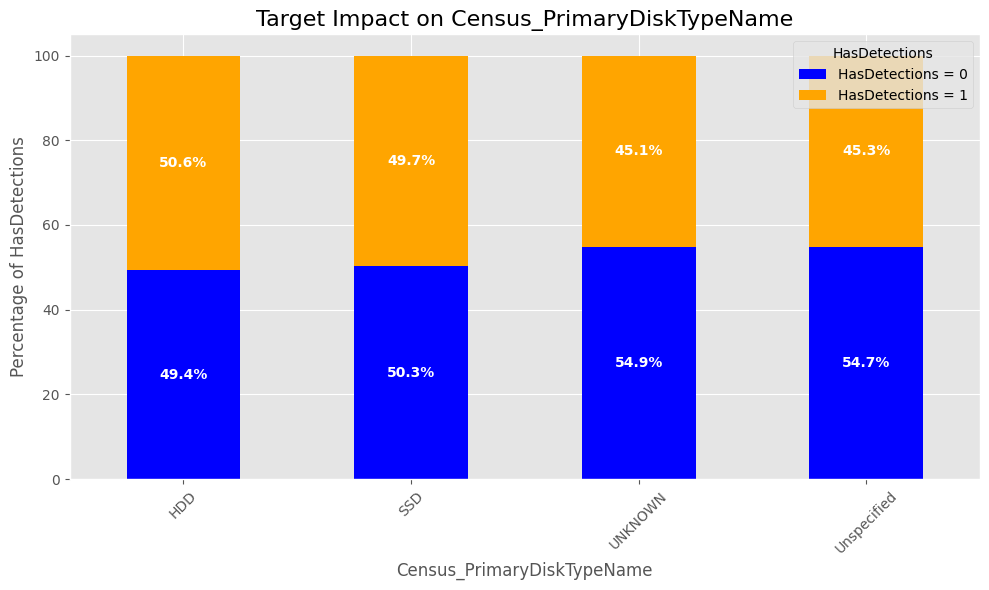

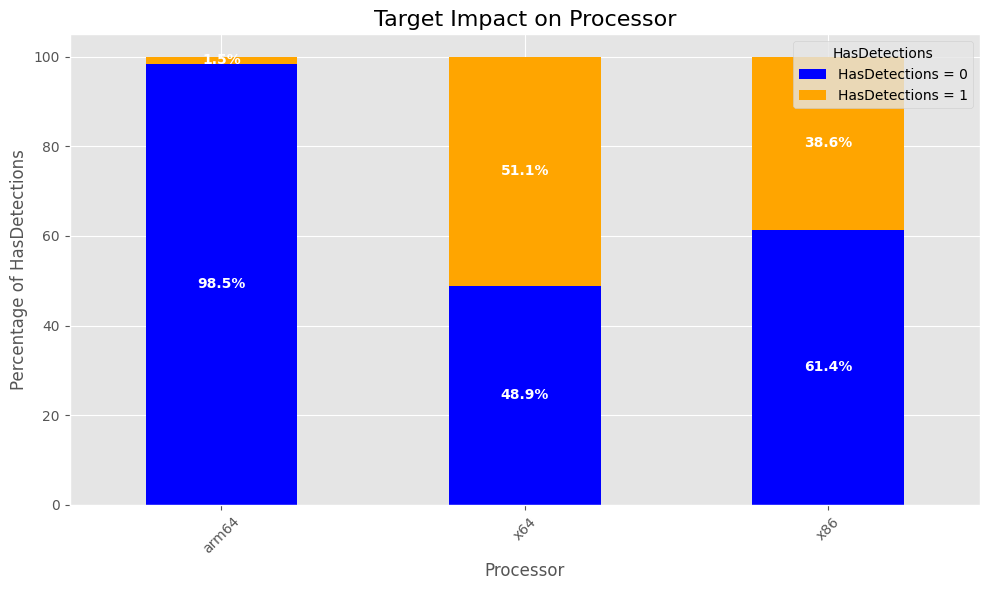

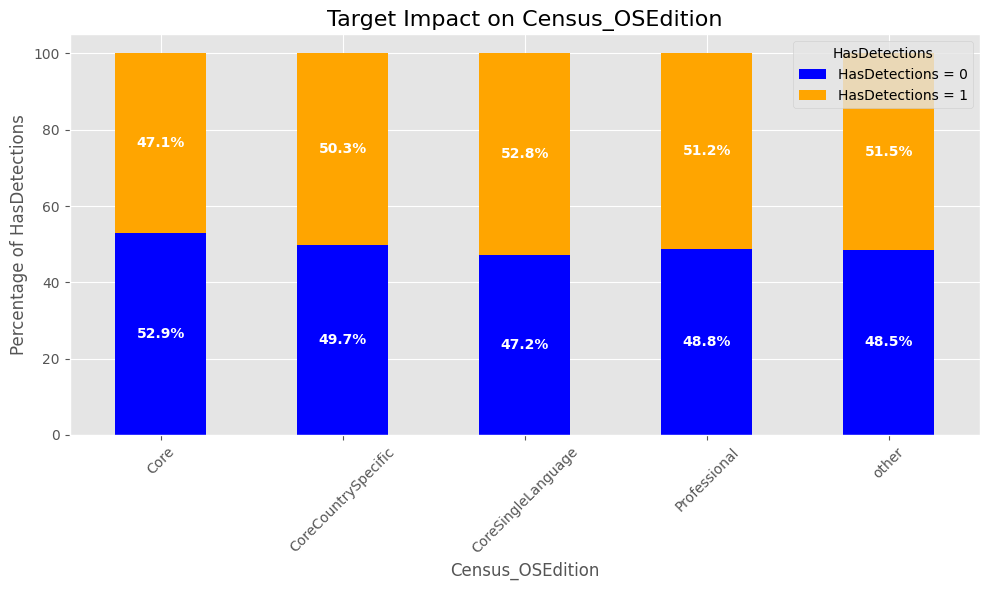

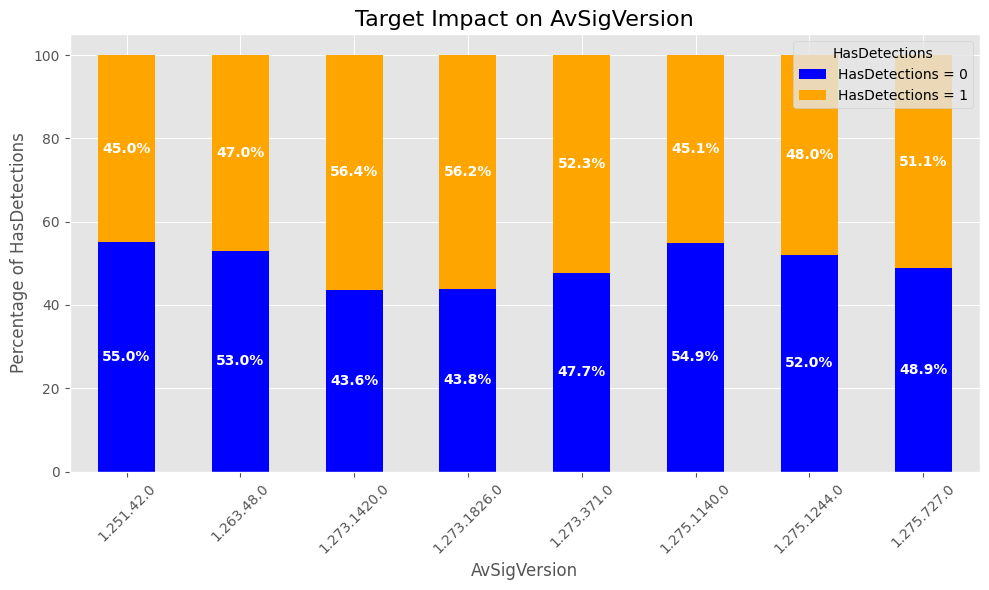

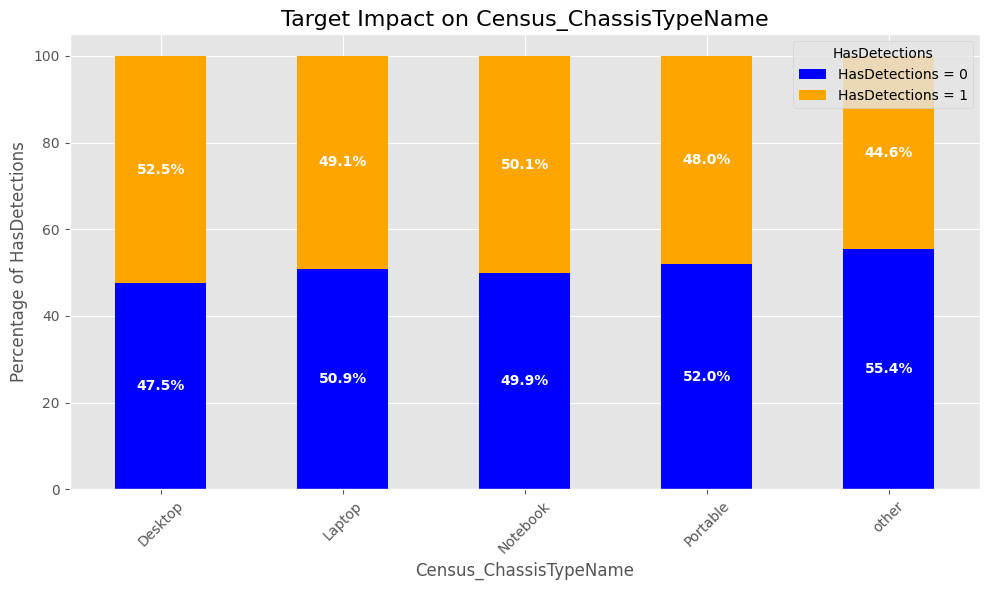

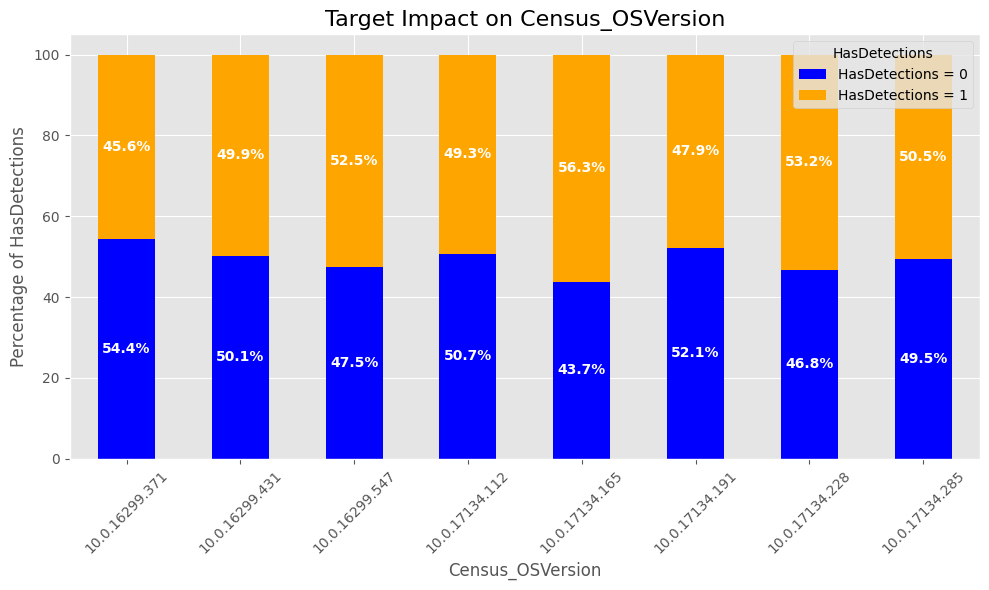

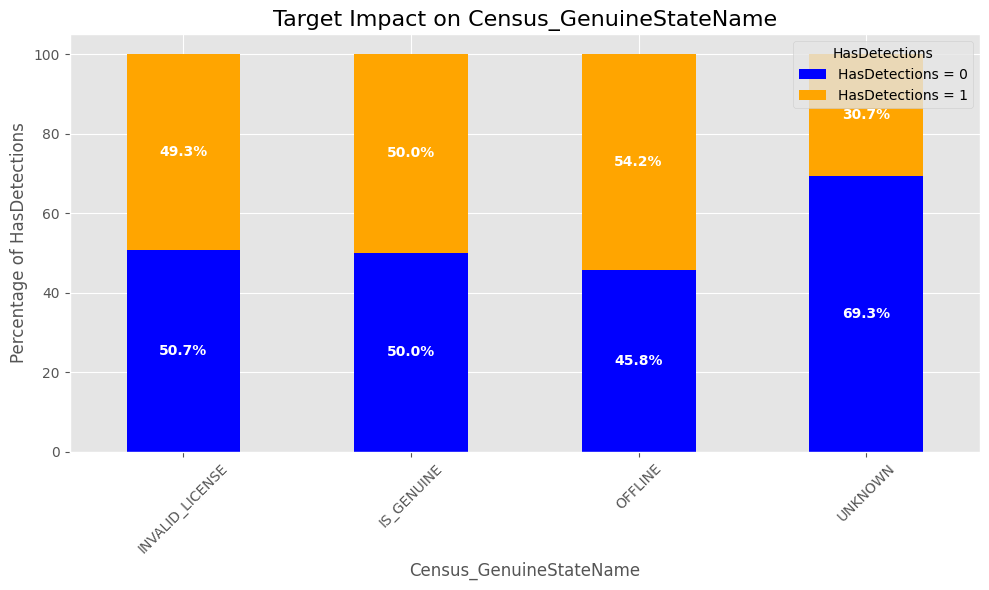

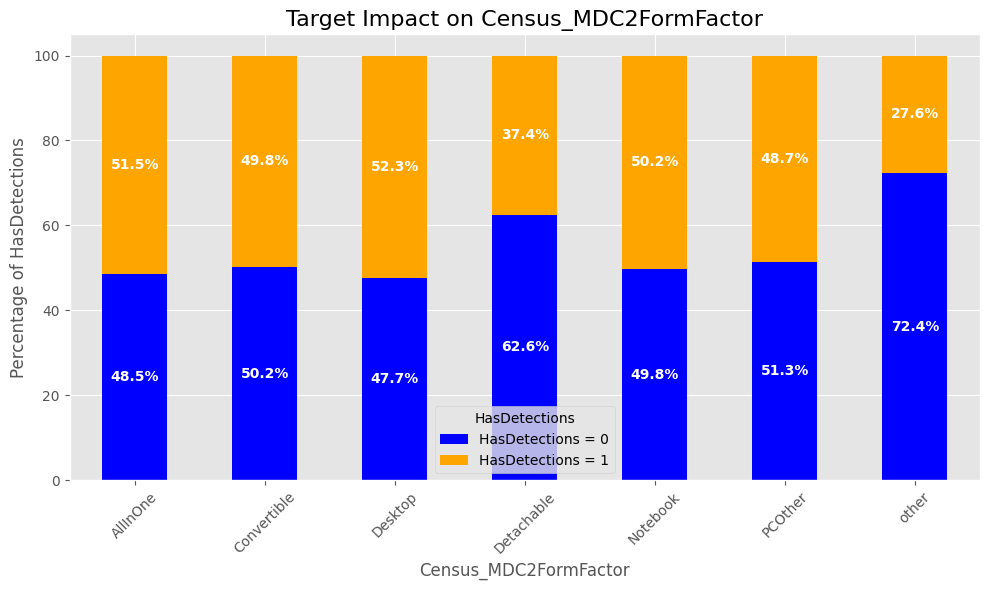

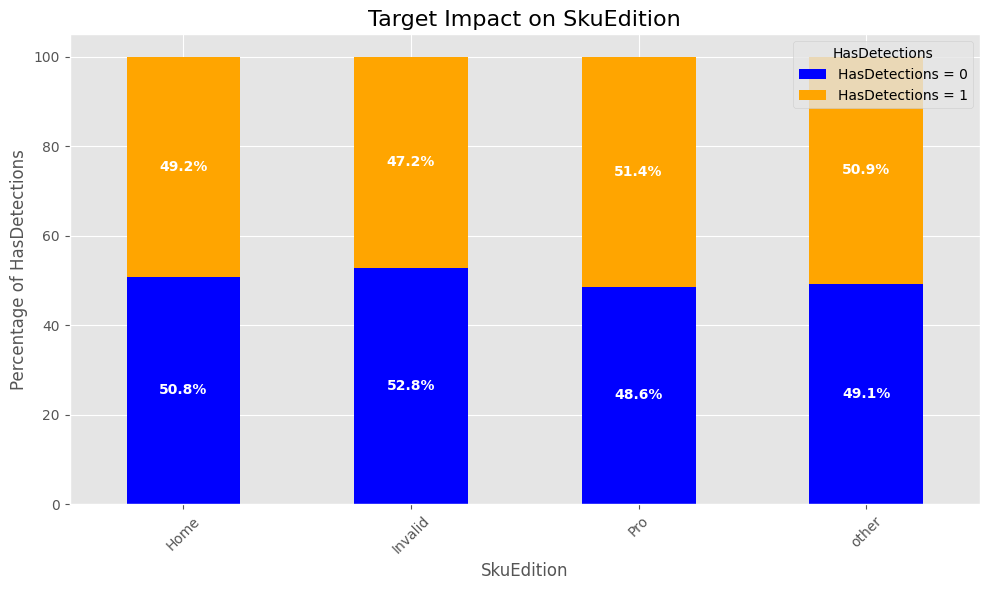

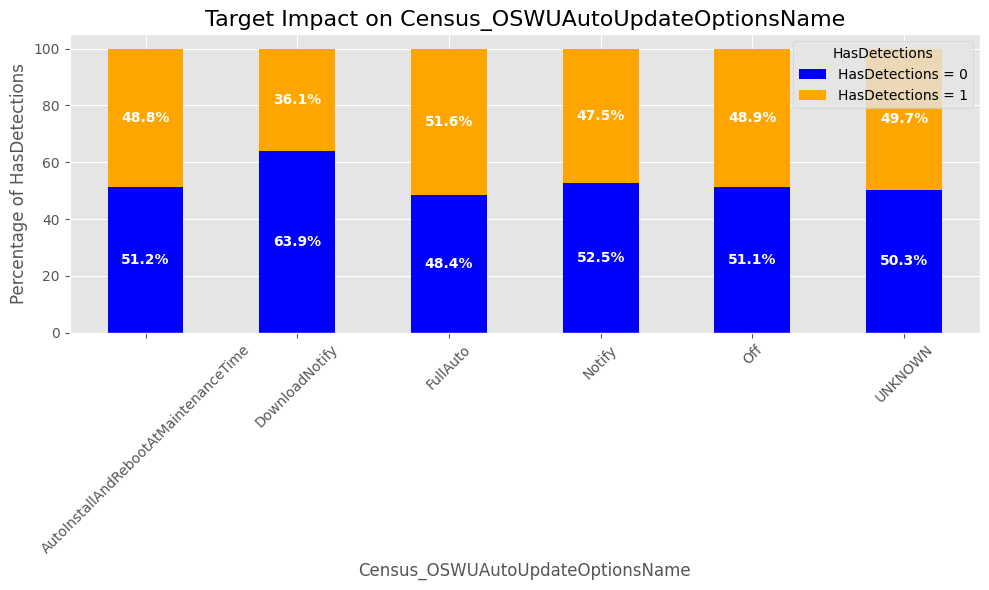

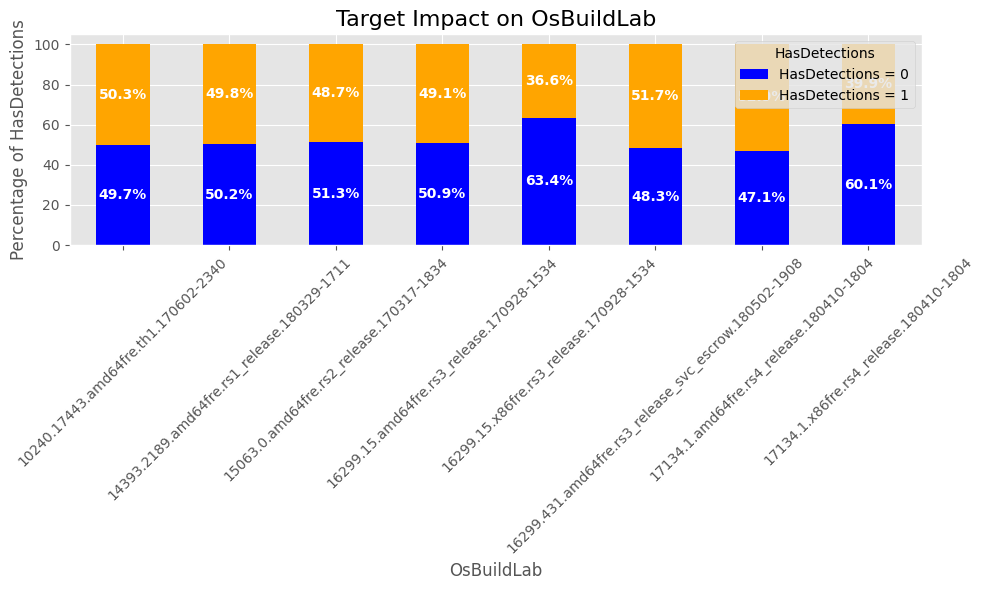

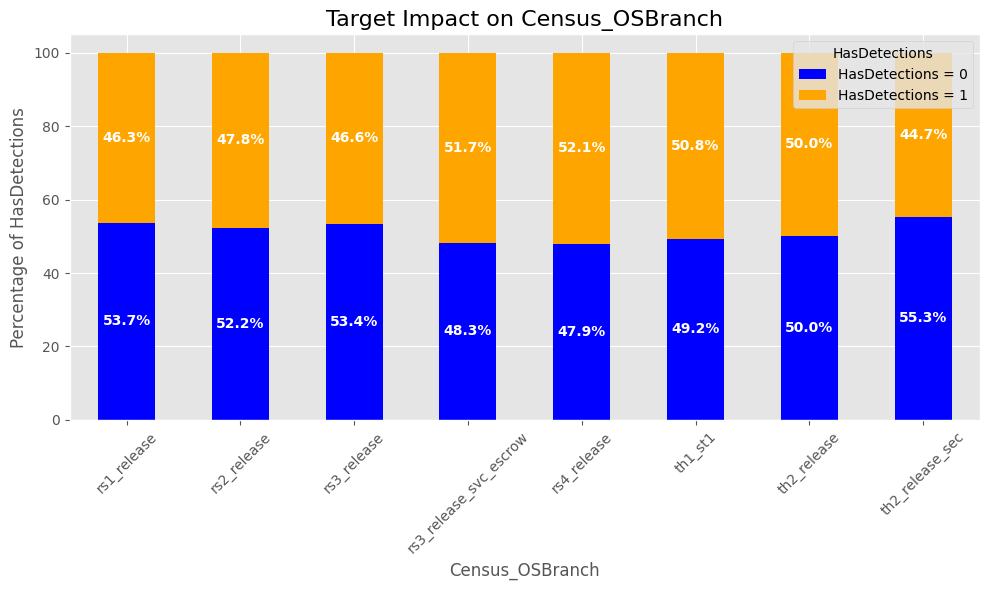

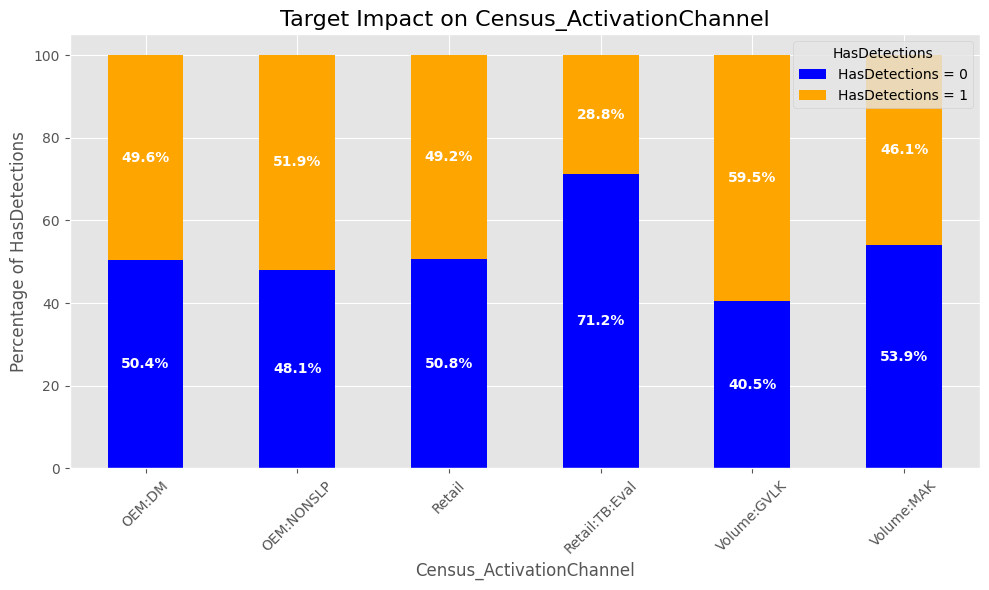

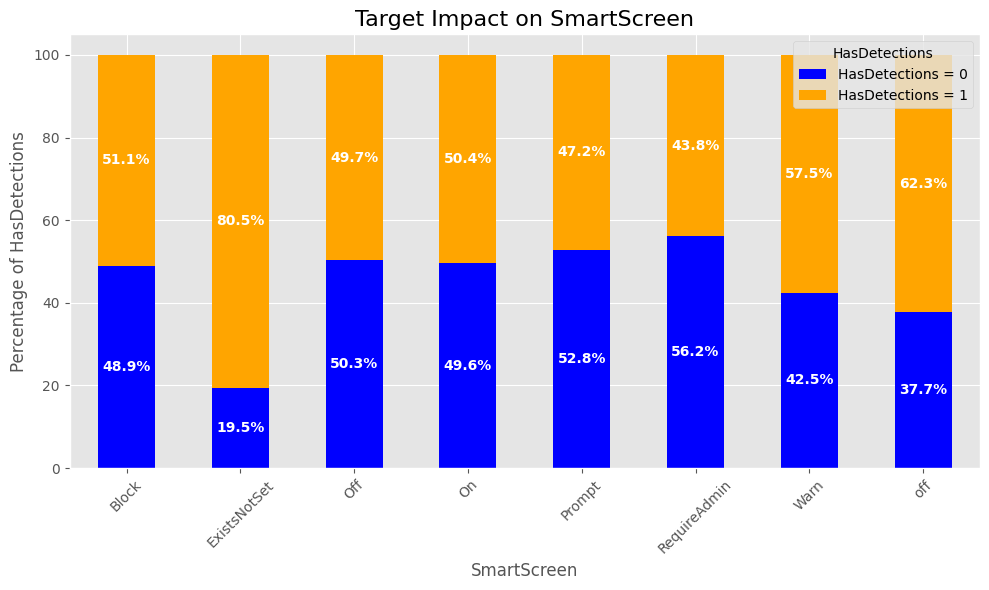

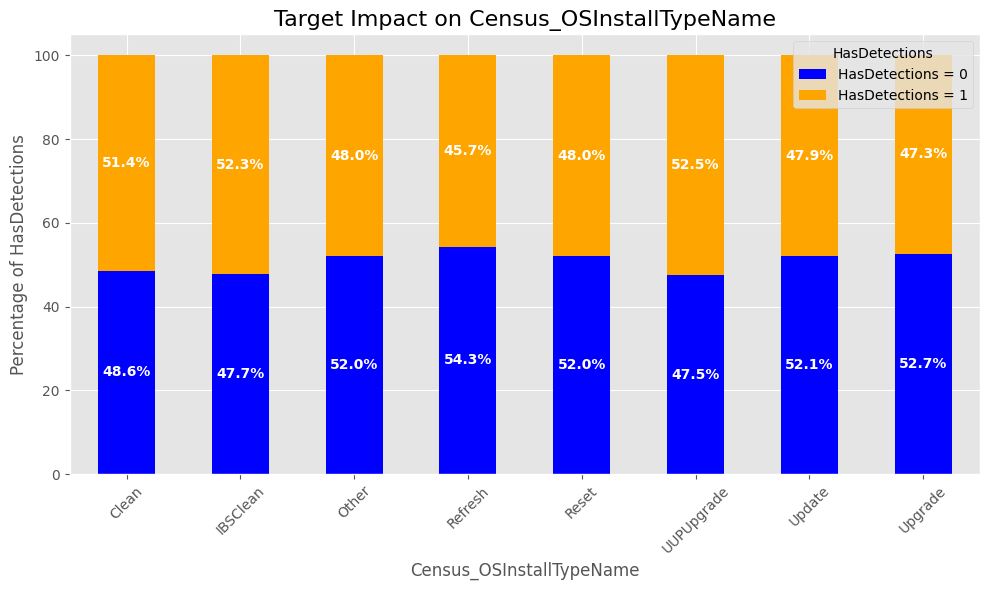

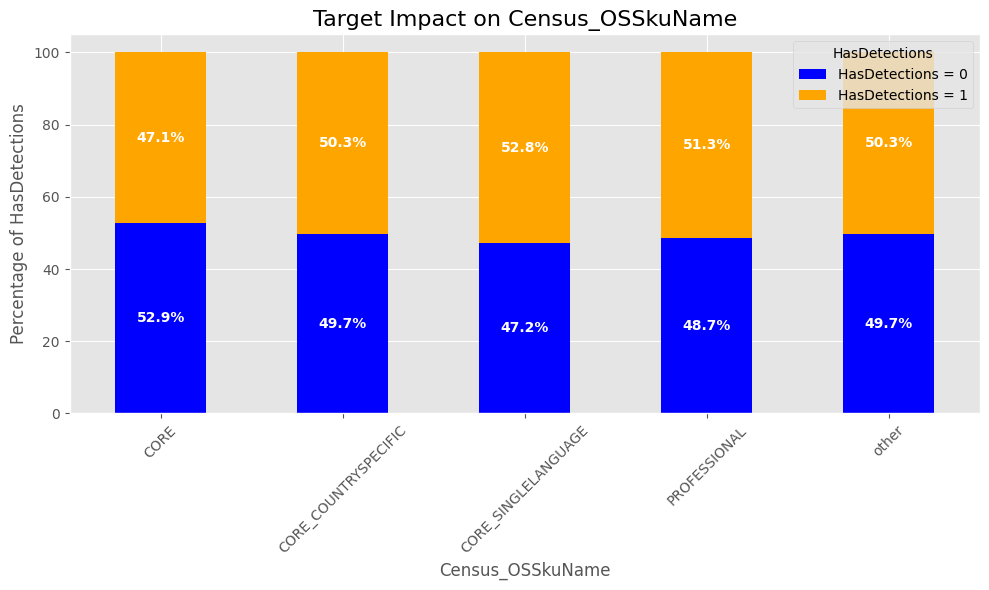

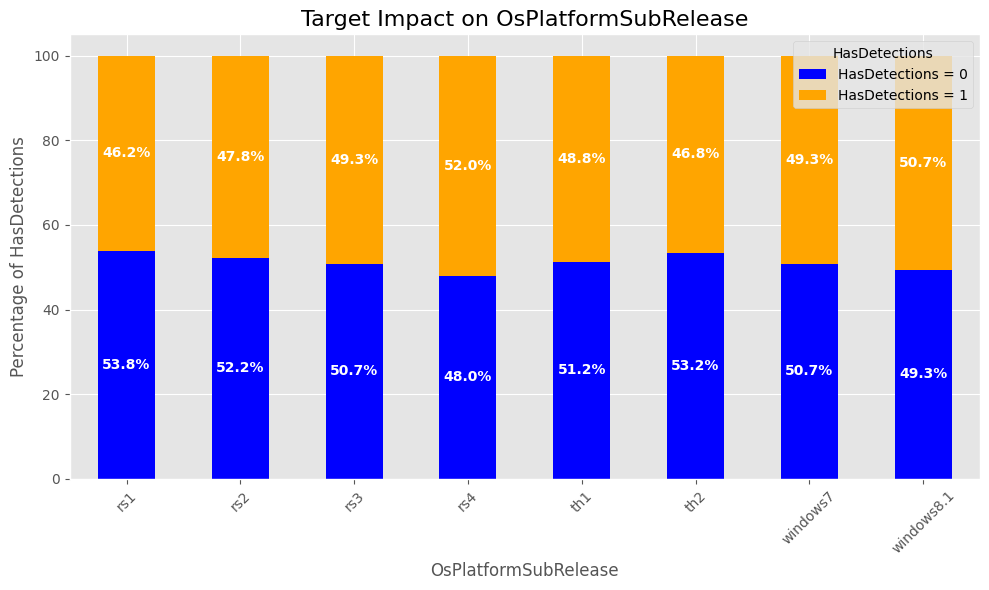

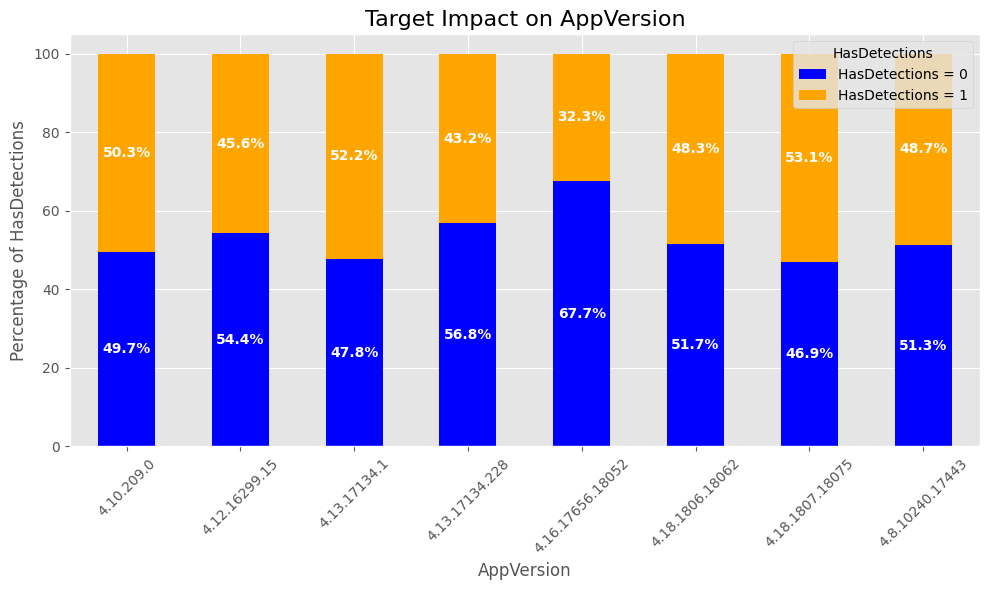

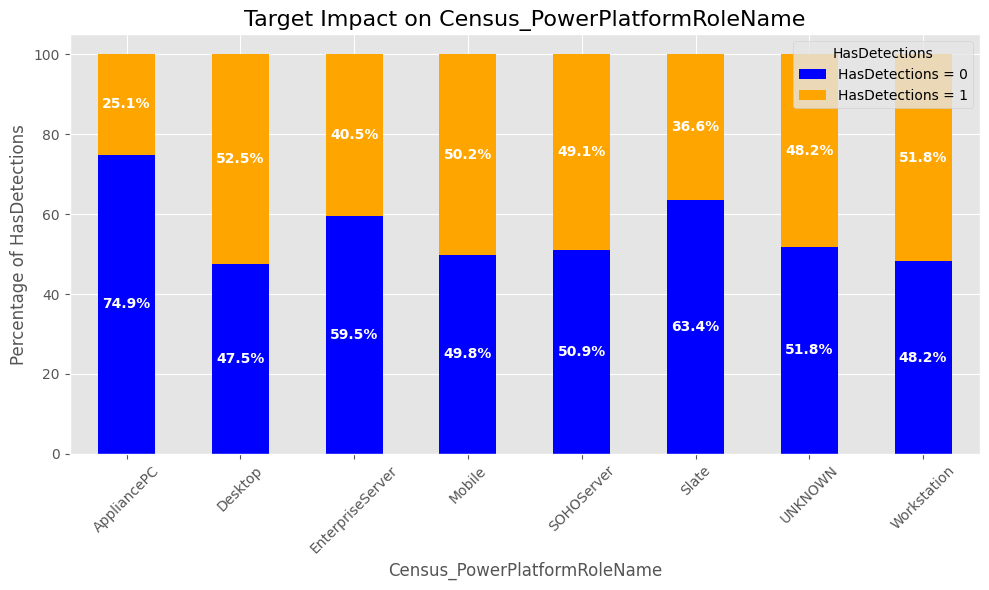

In [18]:
plot_feature_impact(train_df[cat],'HasDetections',8)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_num(data, target, n=5):
    """
    Visualize the percentage of target (0 and 1) for the top `n` most frequent values in each column,
    with `target == 1` in red and `target == 0` in green, using a stacked bar chart.
    
    Parameters:
    data (pd.DataFrame): The input dataframe.
    target (str): The target column name.
    n (int): The number of most frequent values to consider for each column.
    """
    columns = data.columns.drop(target)
    
    for col in columns:
        if data[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
            # Create bins for the numerical column
            data[f'{col}_binned'] = pd.cut(data[col], bins=n, labels=[f'Bin {i+1}' for i in range(n)])
            col_to_plot = f'{col}_binned'
        else:
            col_to_plot = col

        # Get the top n most frequent values in the column or the binned column
        top_n_values = data[col_to_plot].value_counts().nlargest(n).index
        
        # Filter the data for the top n values
        filtered_data = data[data[col_to_plot].isin(top_n_values)]
        
        # Create a pivot table to calculate the percentage of target values (0 and 1)
        pivot_table = pd.crosstab(filtered_data[col_to_plot], filtered_data[target], normalize='index') * 100
        
        # Plot the stacked bar chart
        pivot_table.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(10, 6))
        
        # Add annotations for the percentage
        for i in range(len(pivot_table)):
            for j, val in enumerate(pivot_table.iloc[i]):
                plt.text(i, pivot_table.iloc[i, :j+1].sum() - (val / 2), f'{val:.1f}%', 
                         ha='center', va='center', color='white', fontsize=10, fontweight='bold')
        
        # Update the title and labels
        plt.title(f'Target Impact on {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel(f'Percentage of {target}', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend([f'{target} = 0', f'{target} = 1'], title=target)
        
        plt.tight_layout()
        plt.show()

# Example usage:
# Assuming 'df' is your DataFrame and 'HasDetections' is your target column
# plot_feature_impact(df, 'HasDetections', n=5)


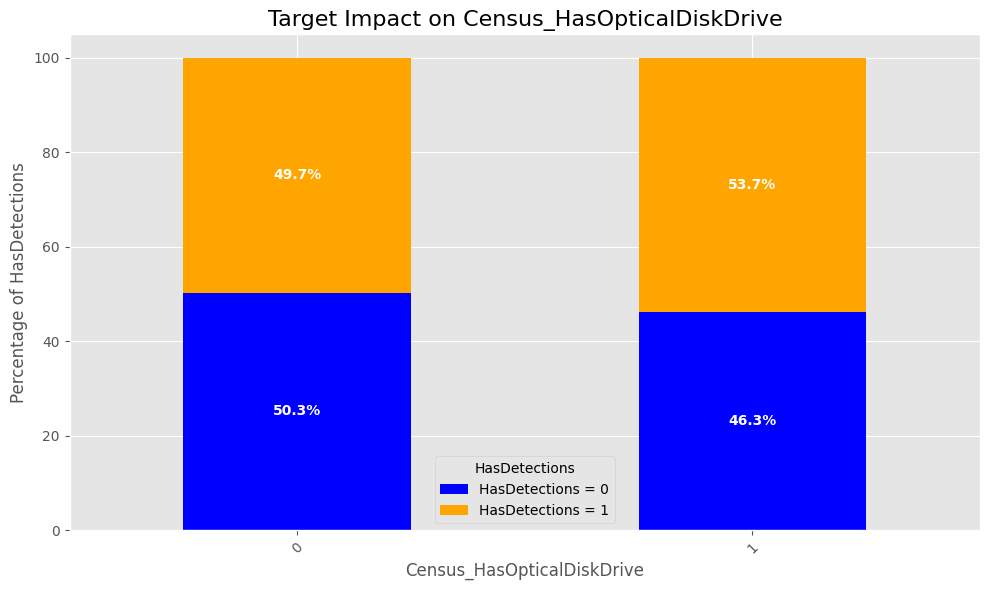

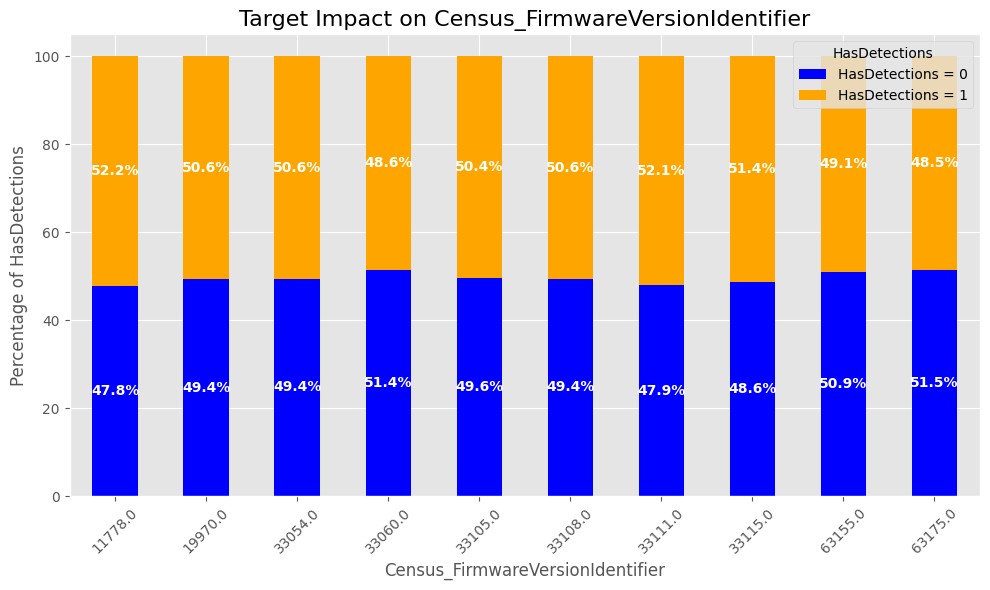

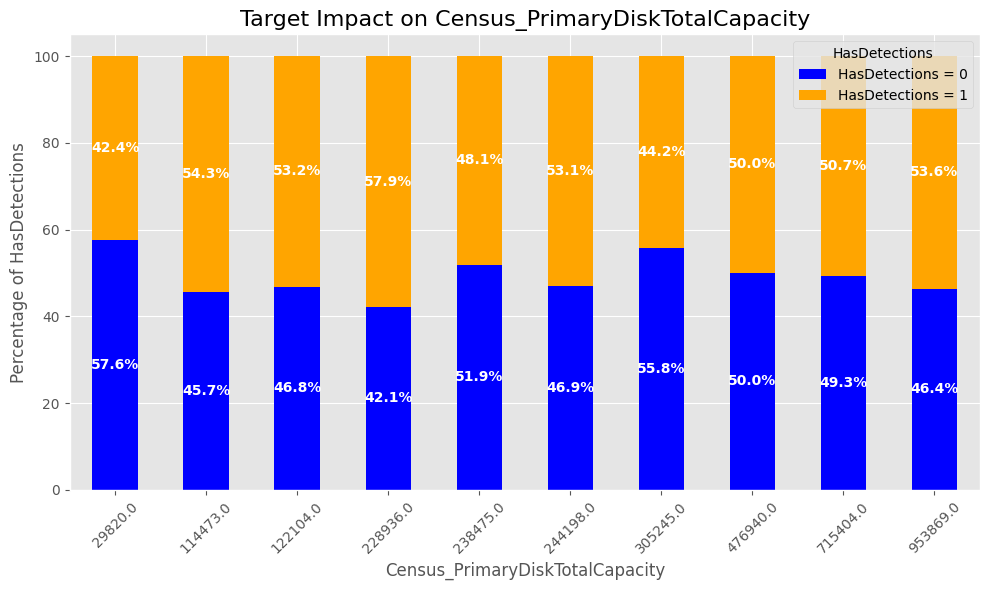

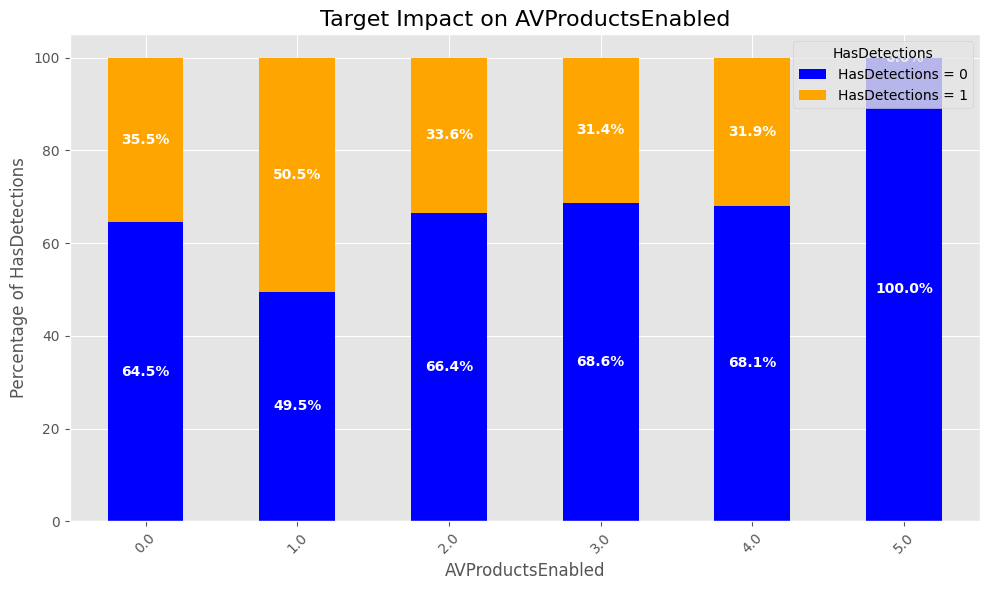

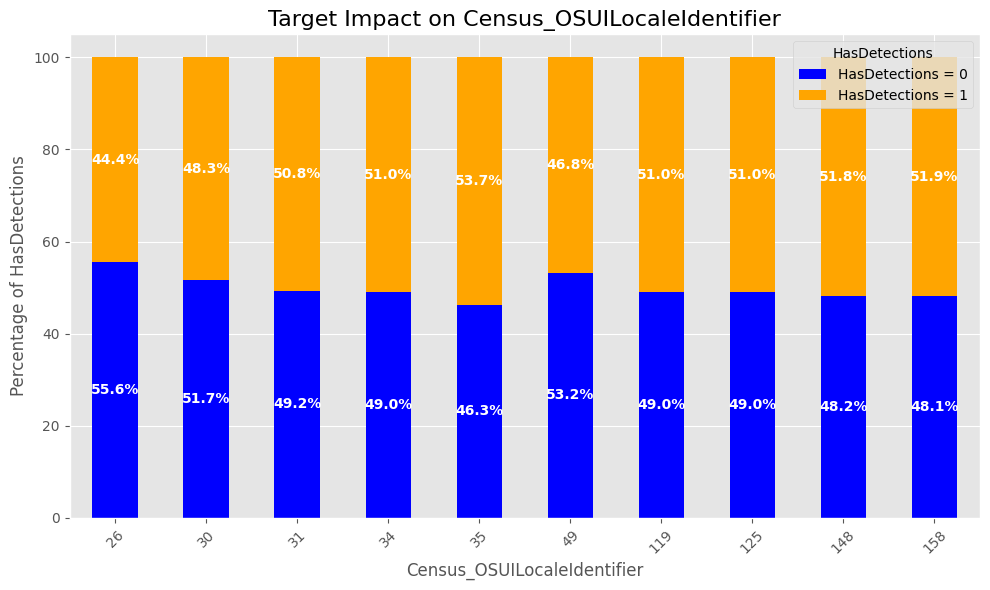

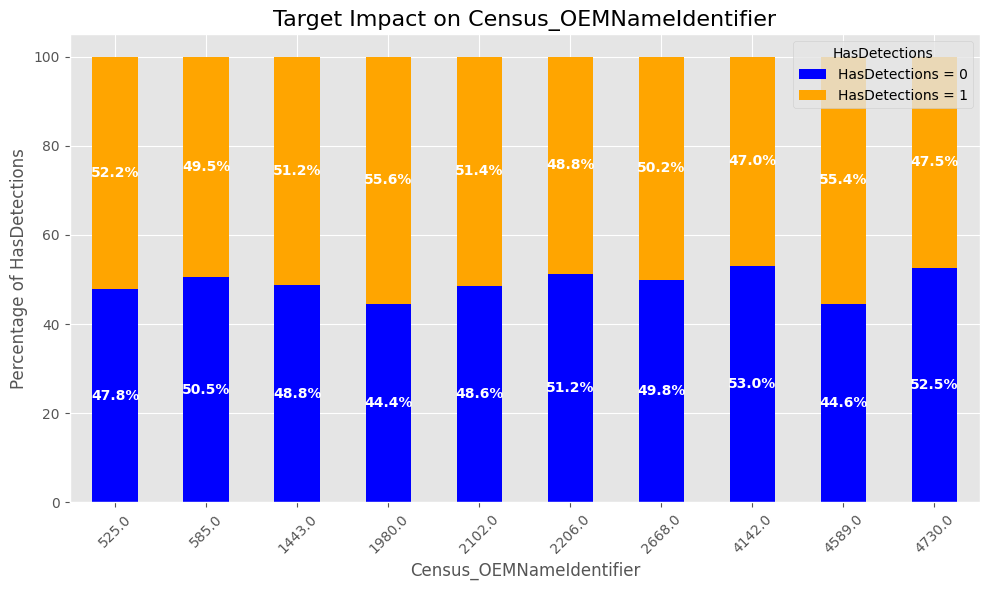

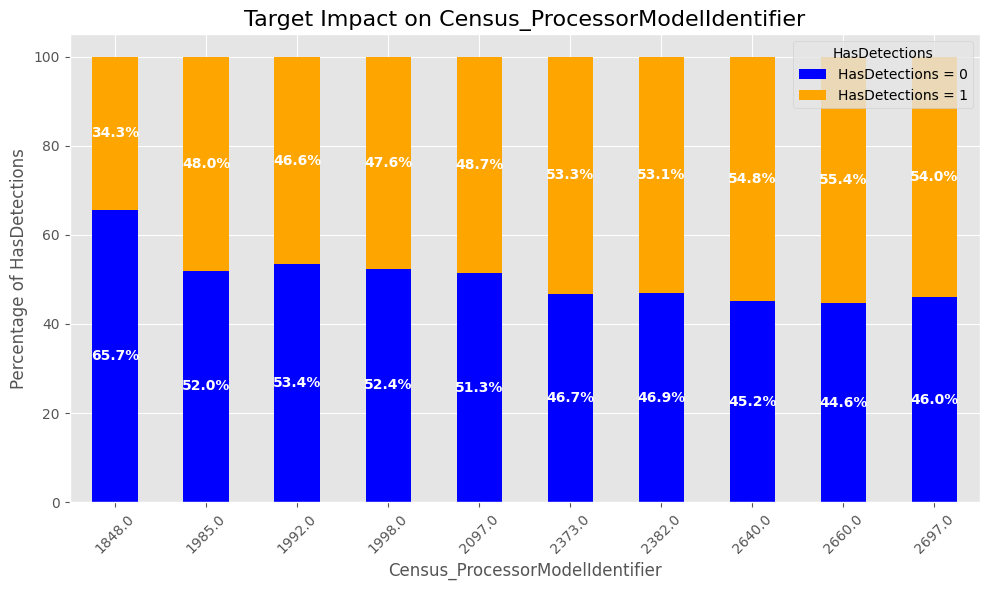

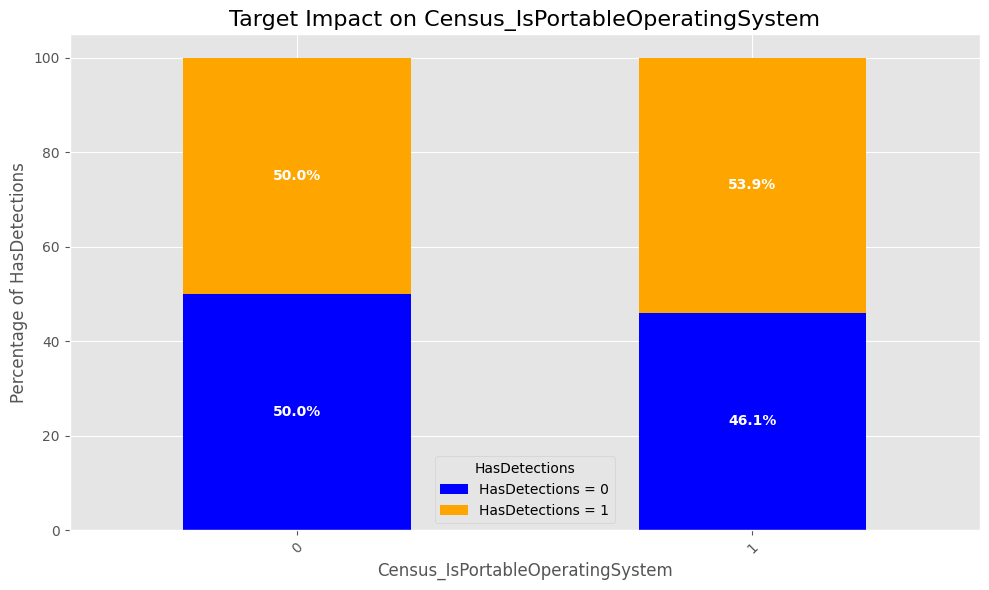

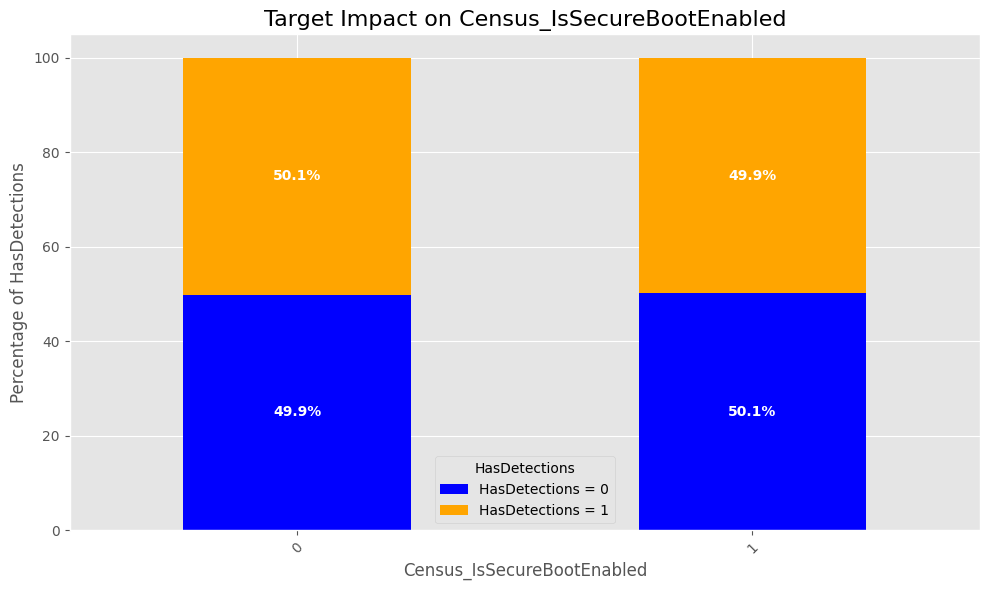

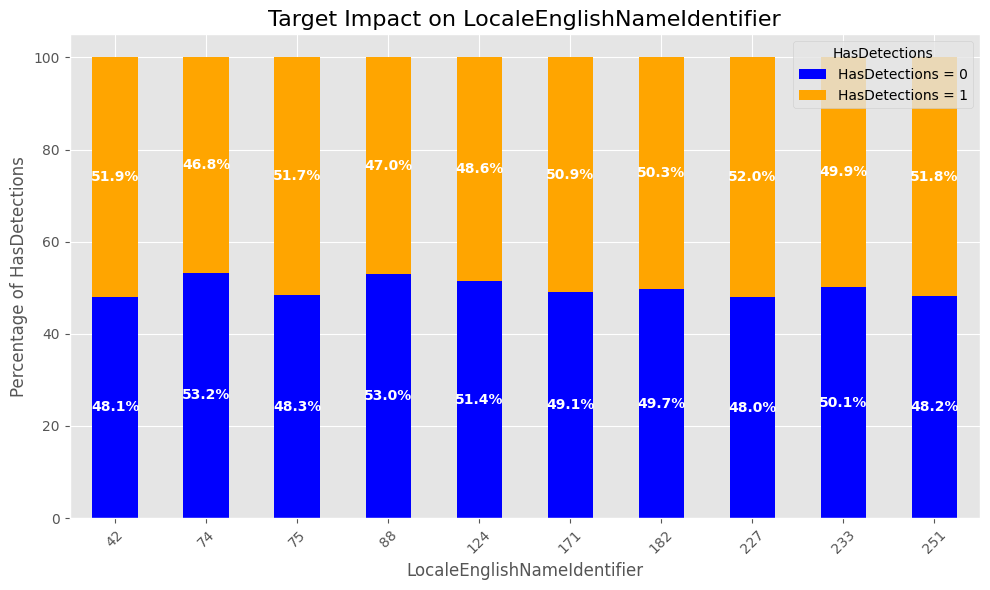

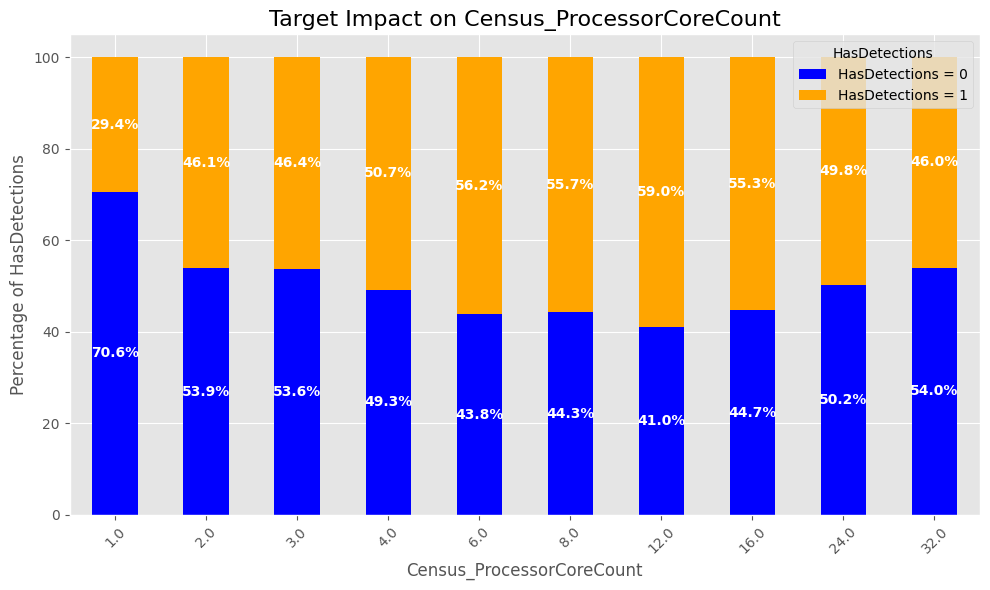

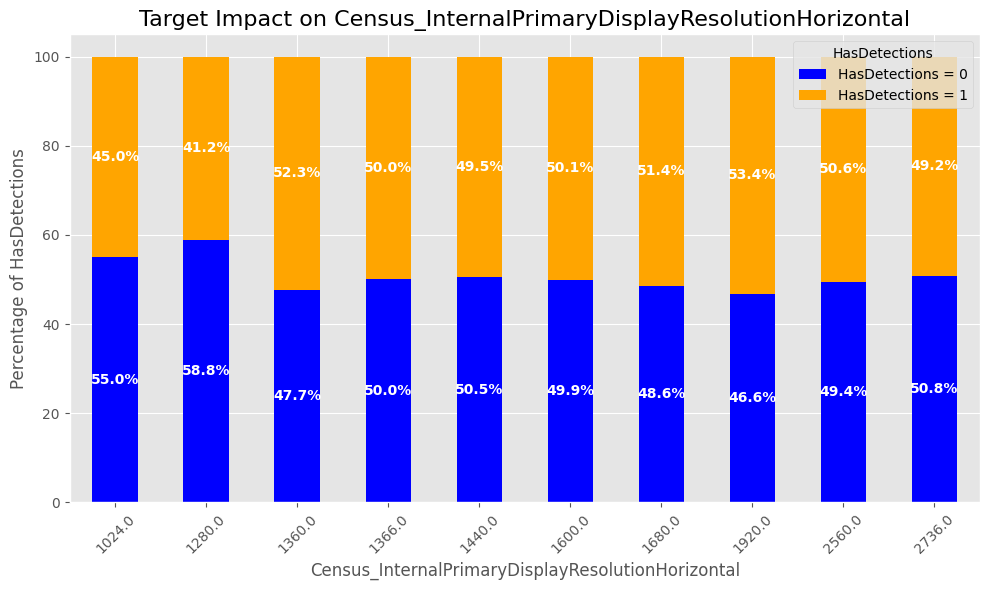

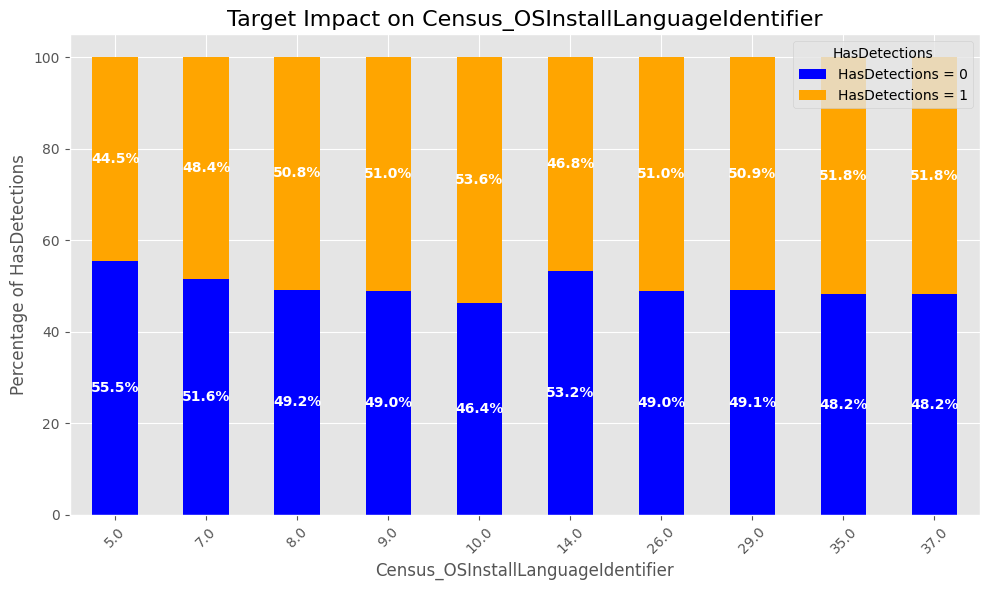

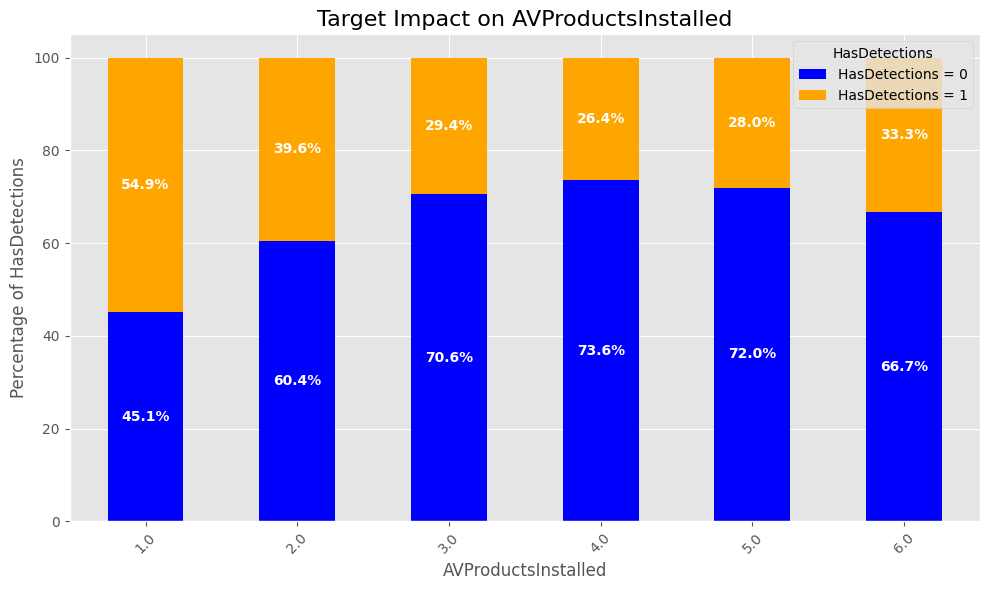

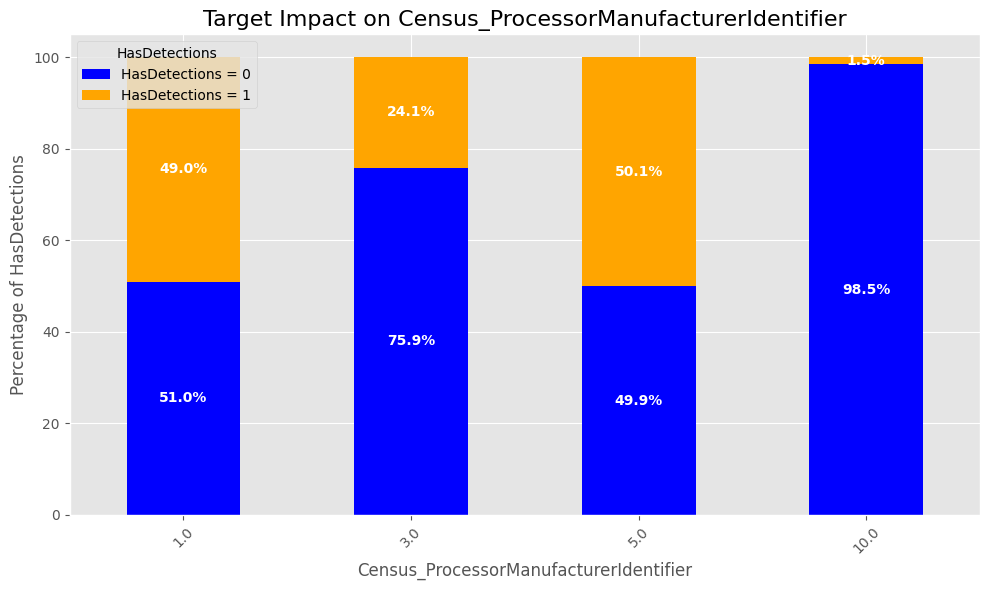

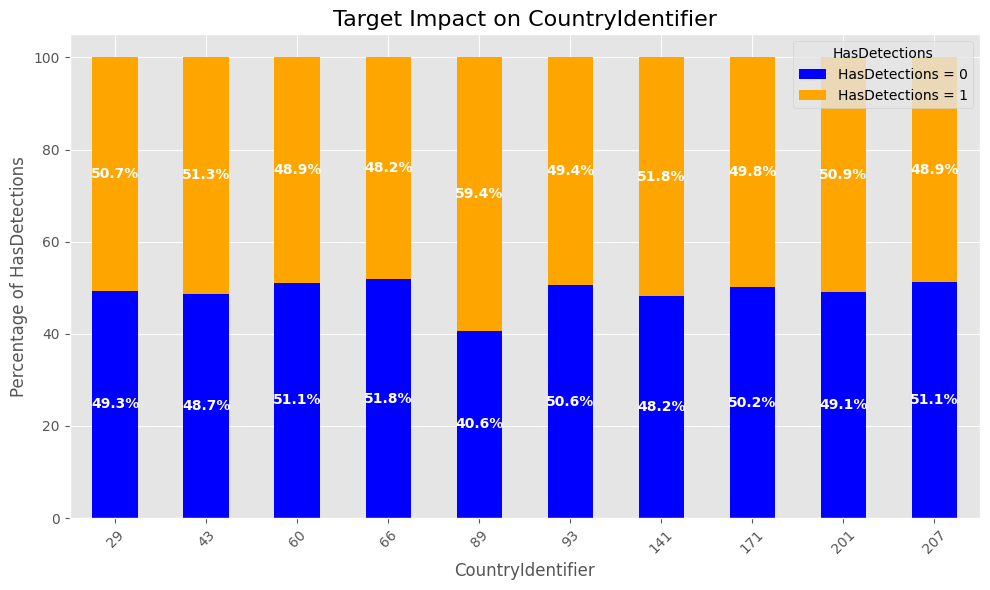

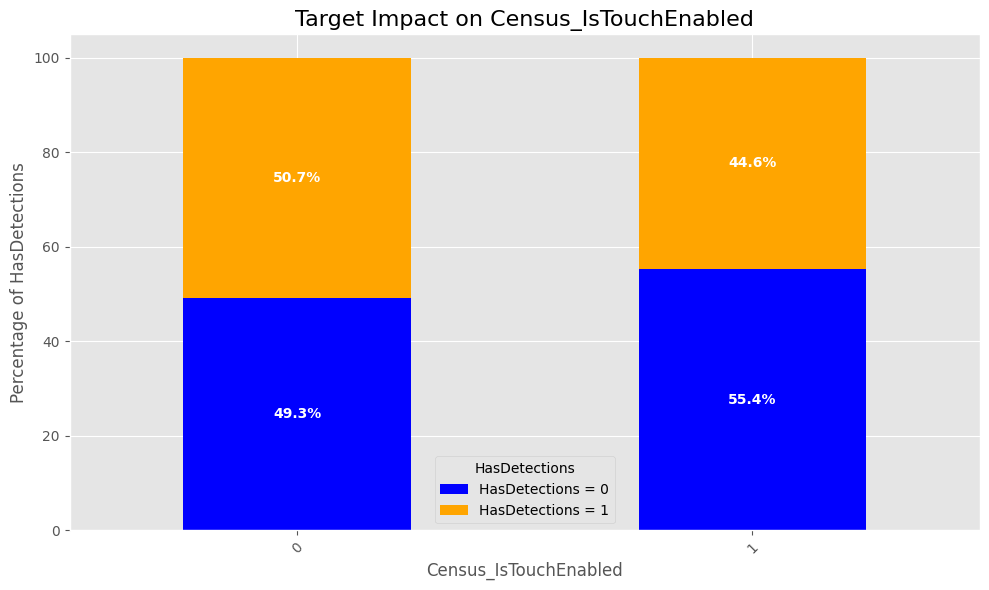

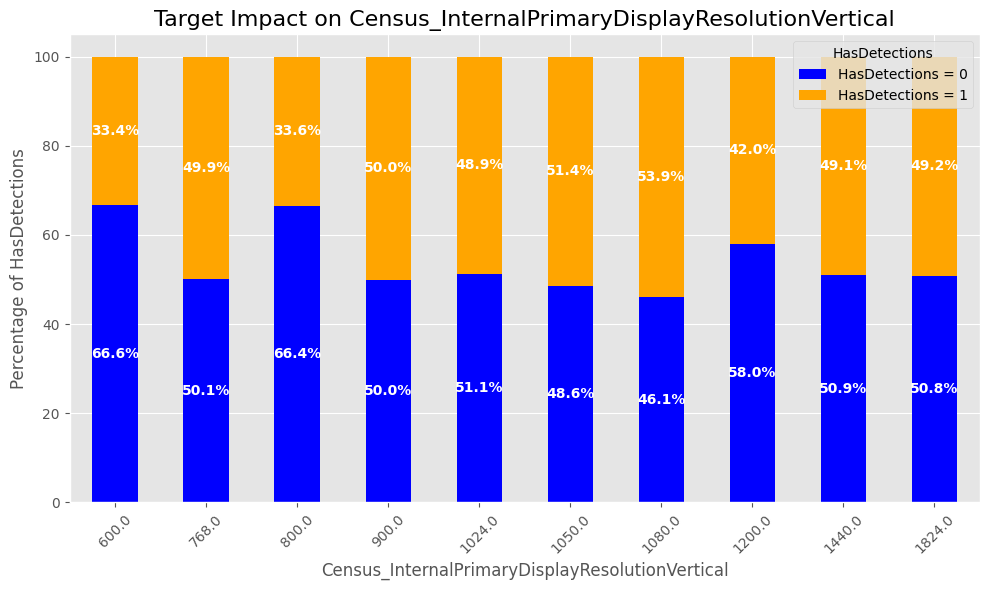

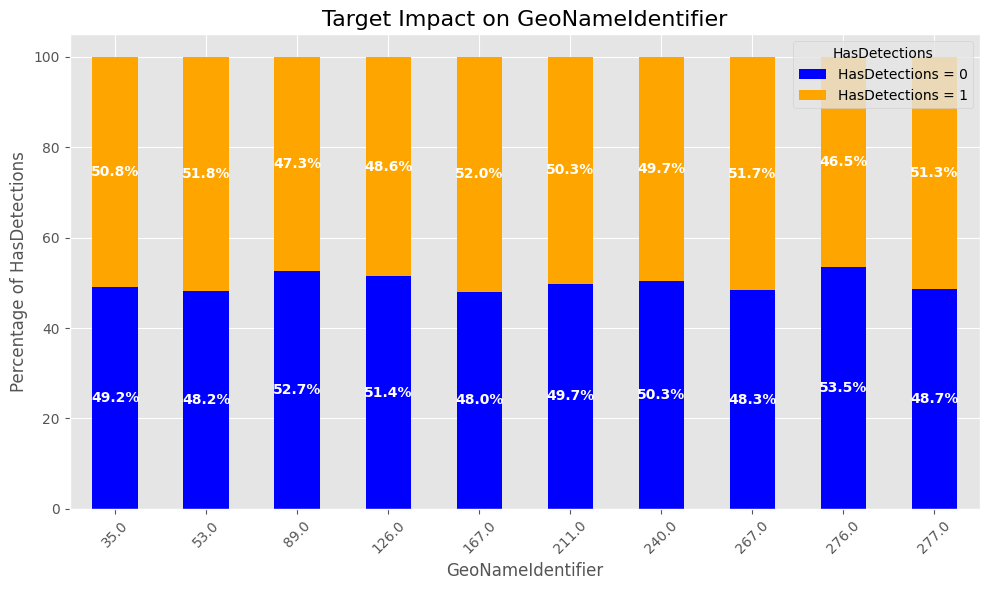

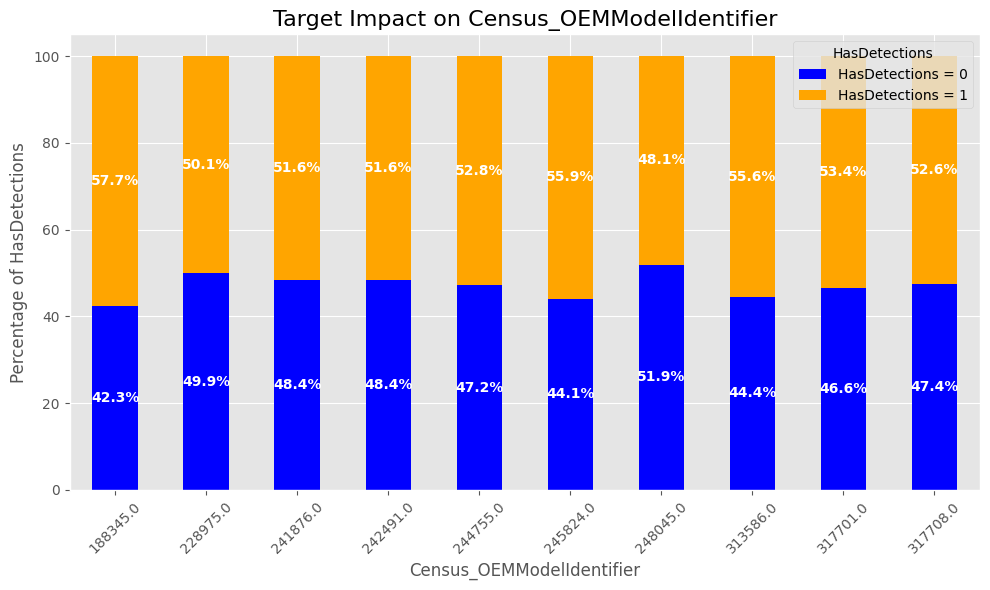

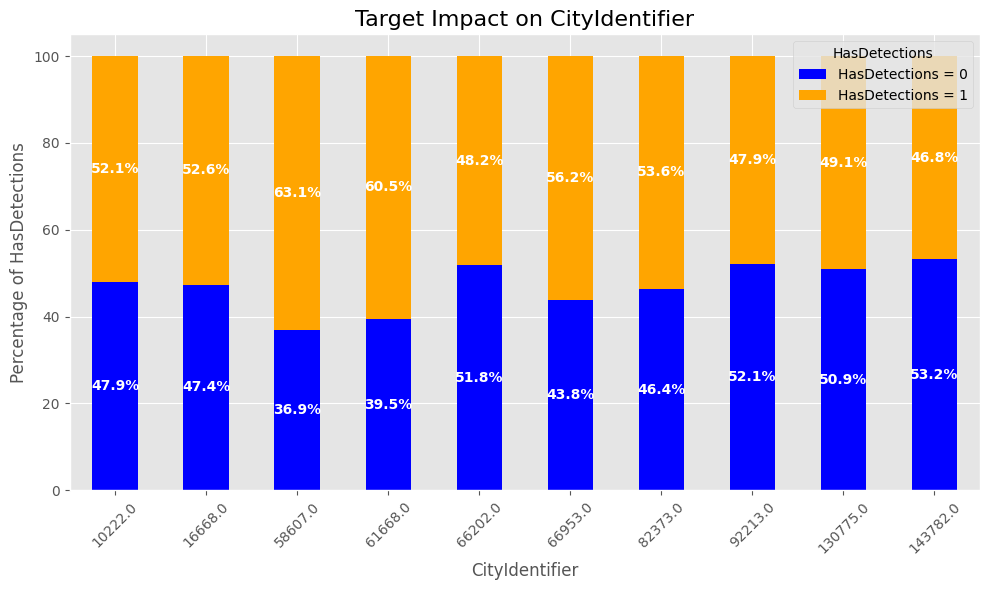

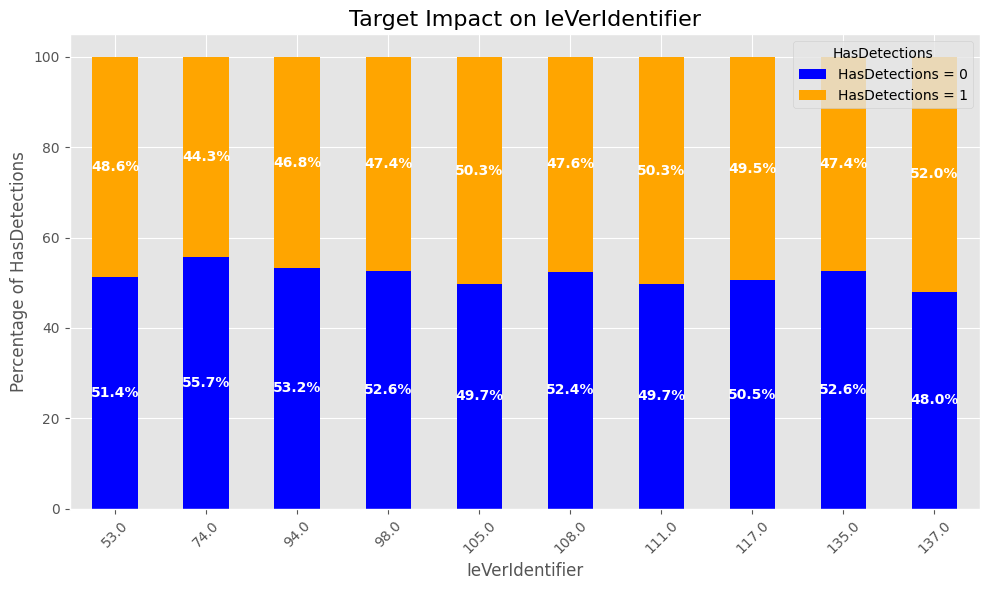

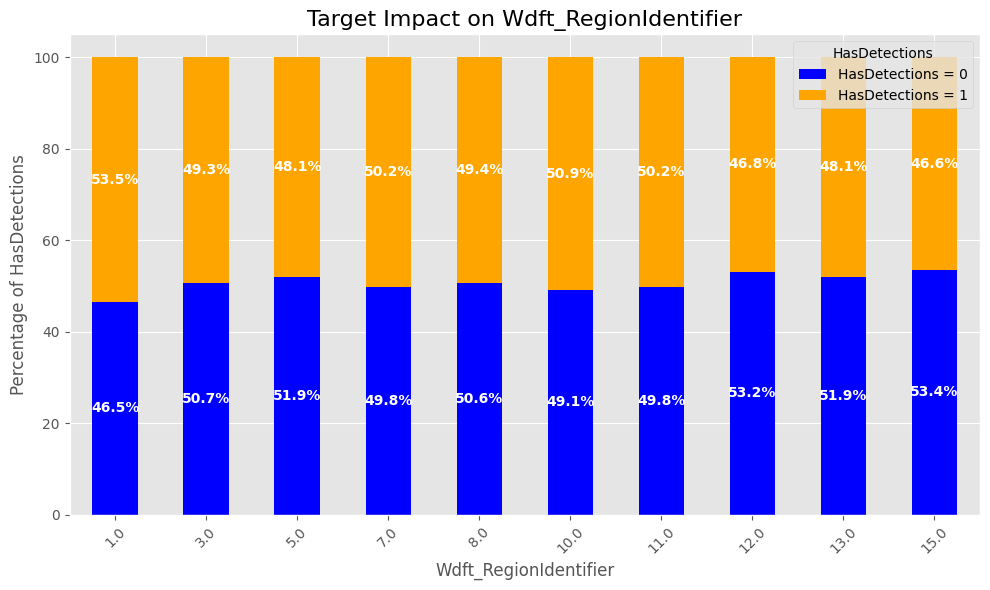

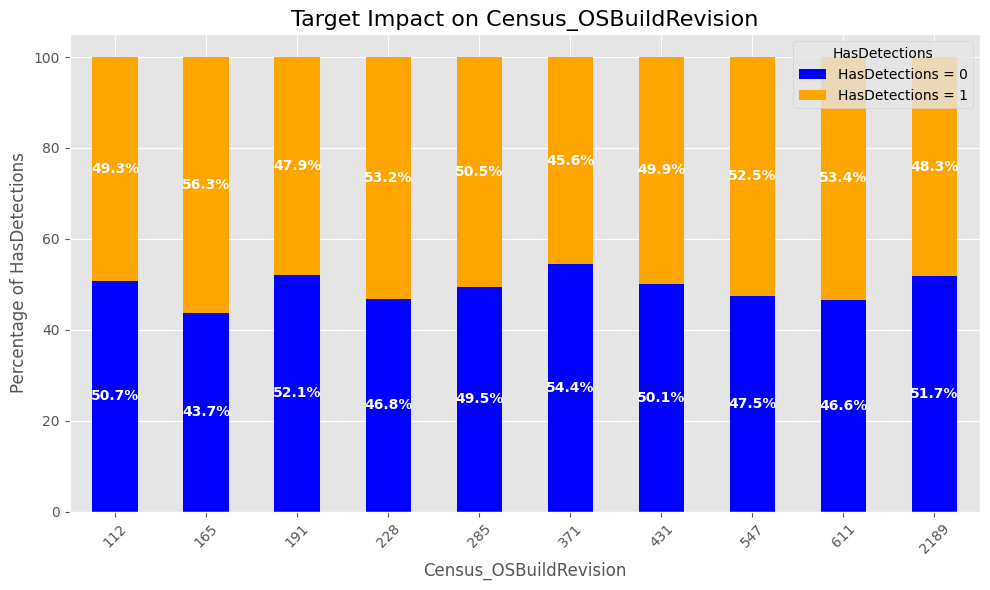

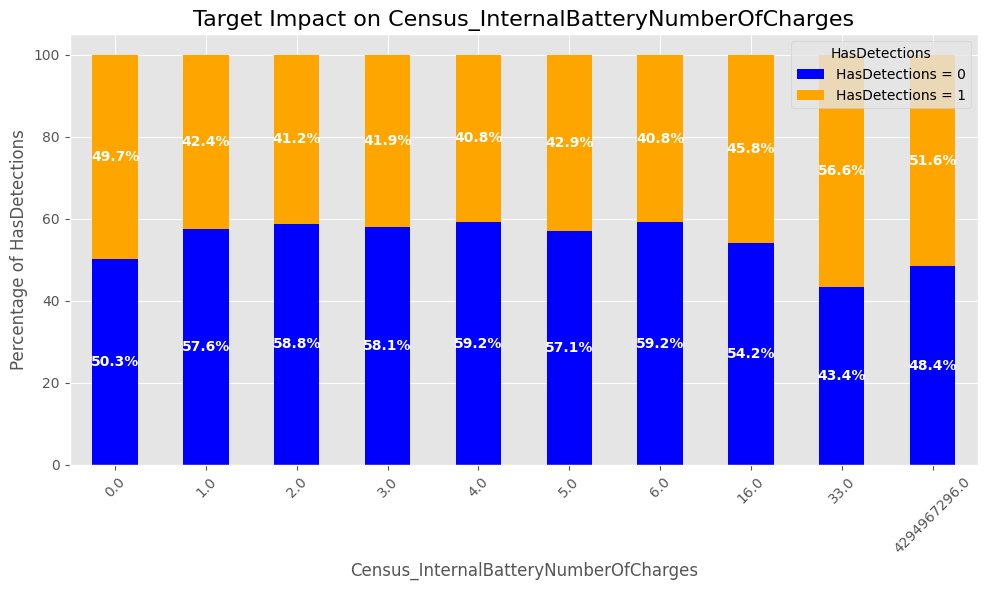

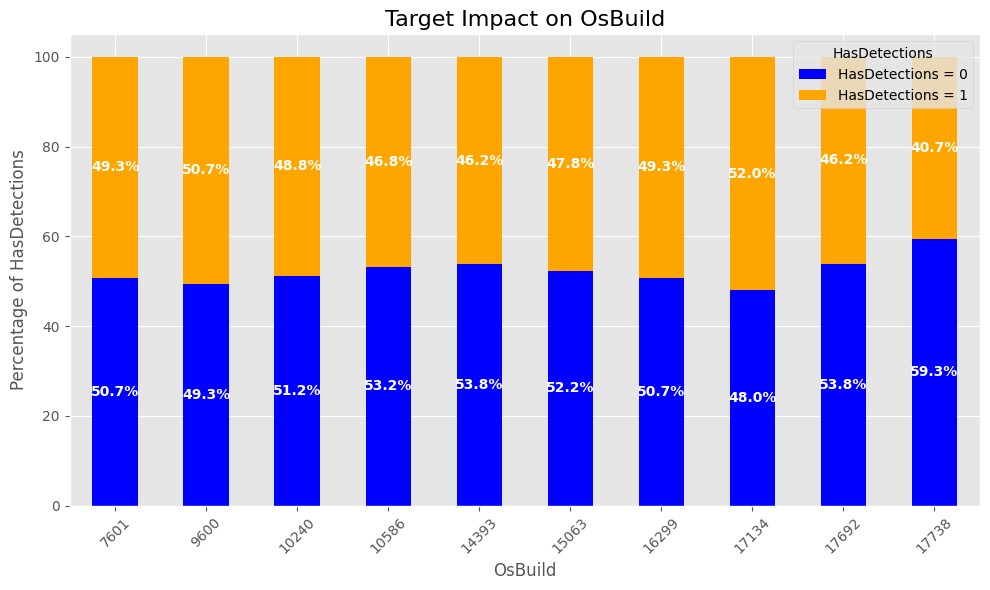

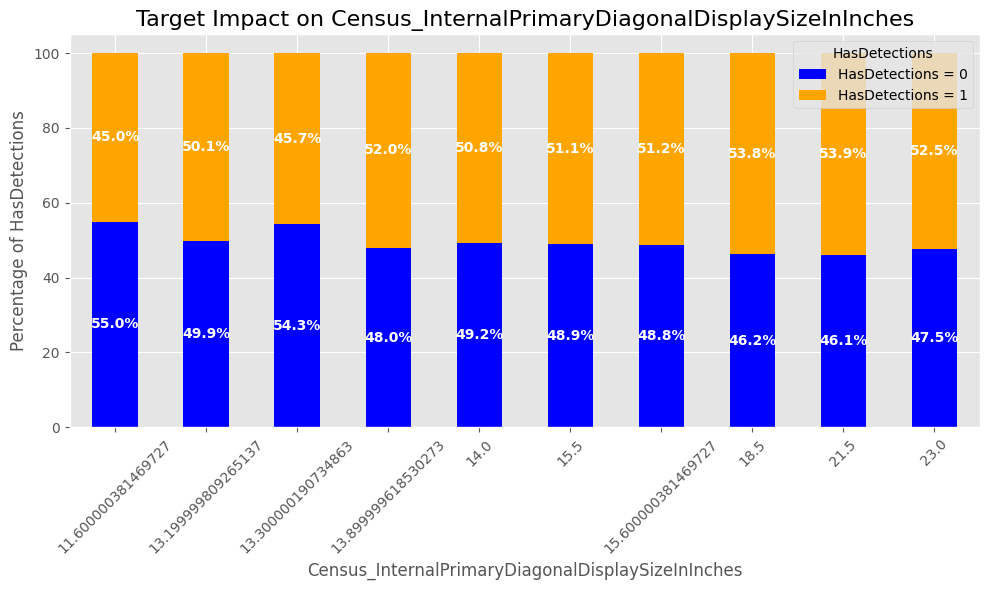

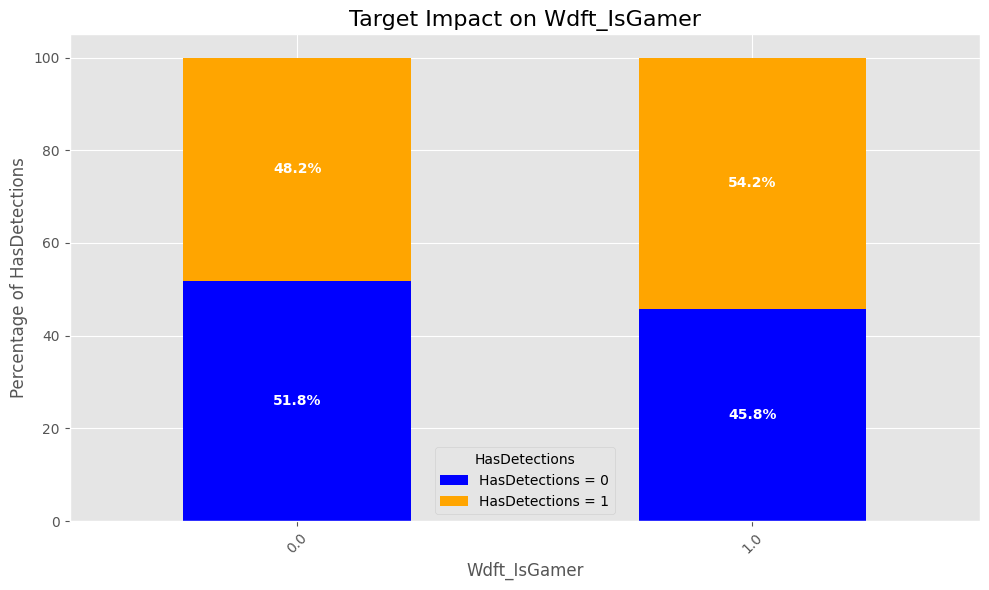

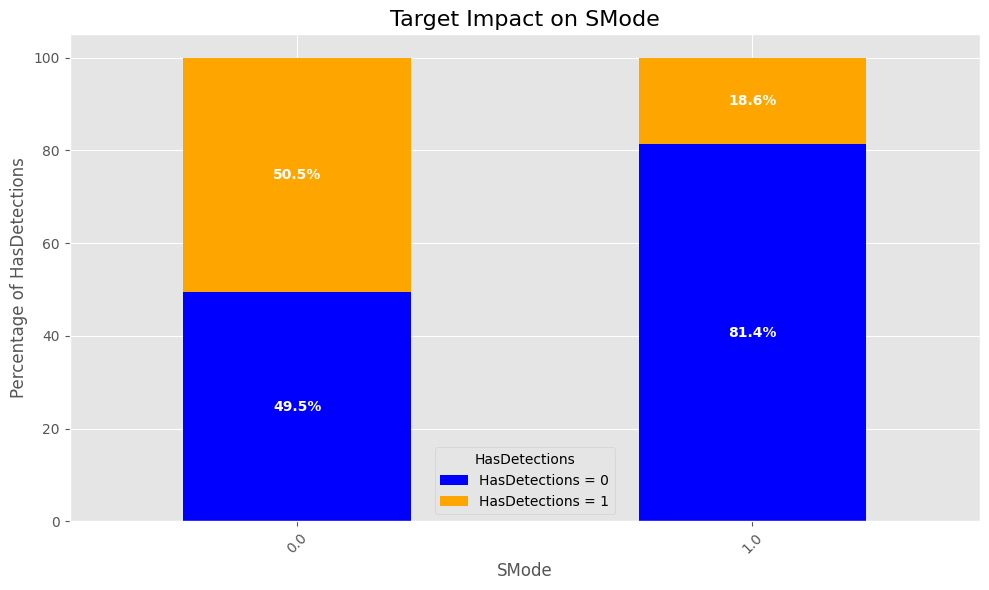

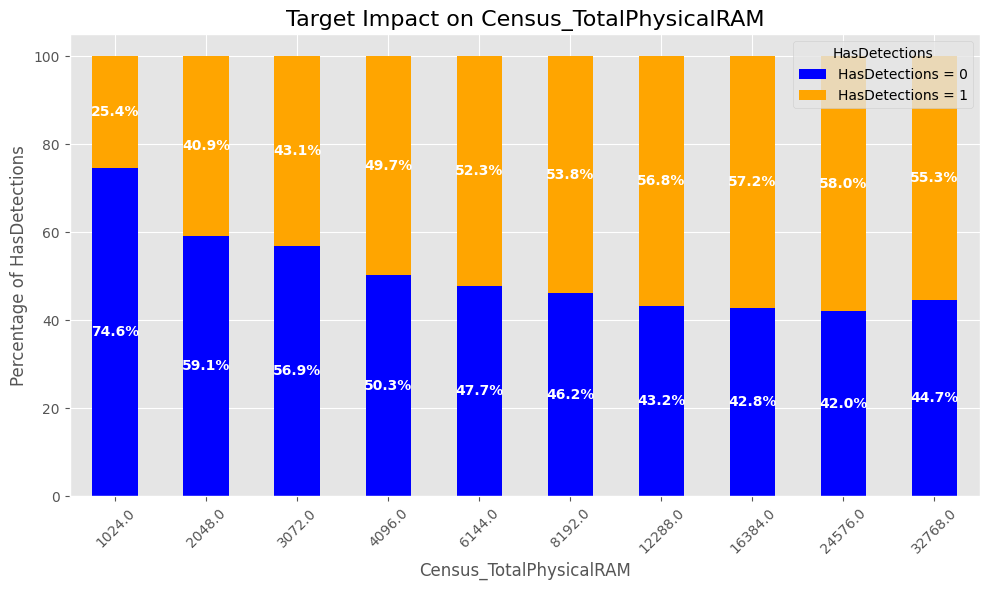

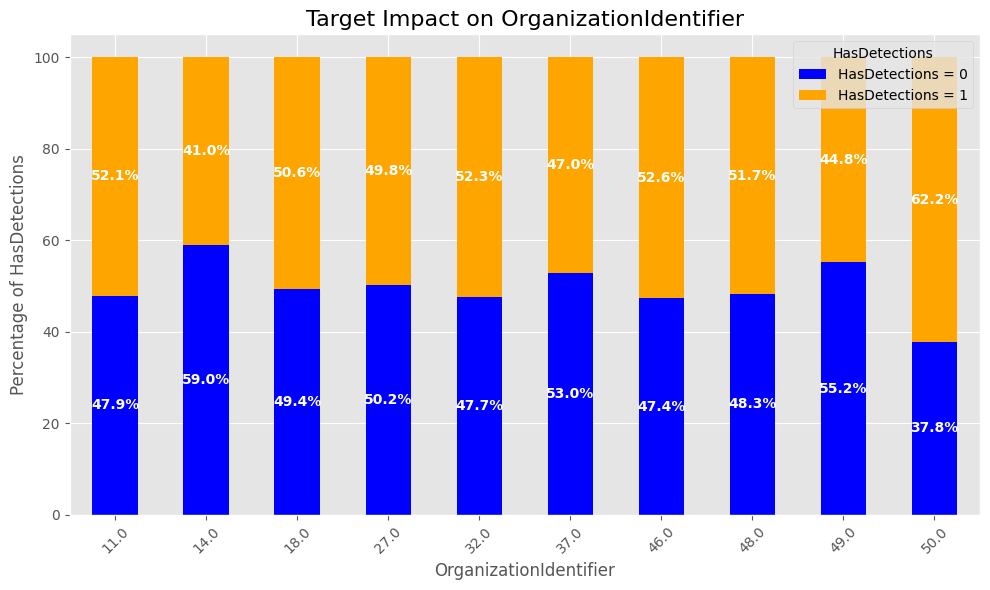

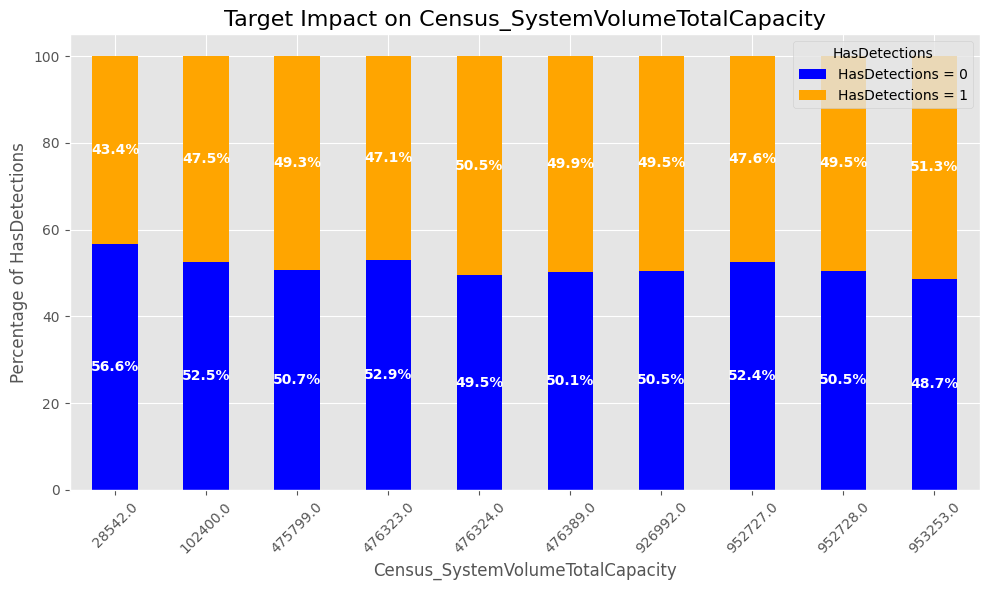

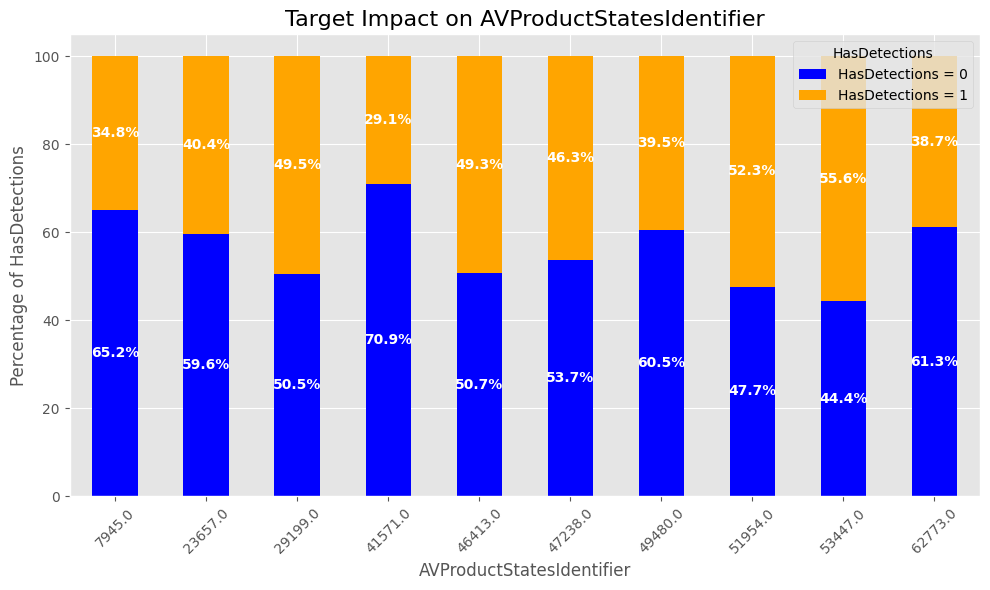

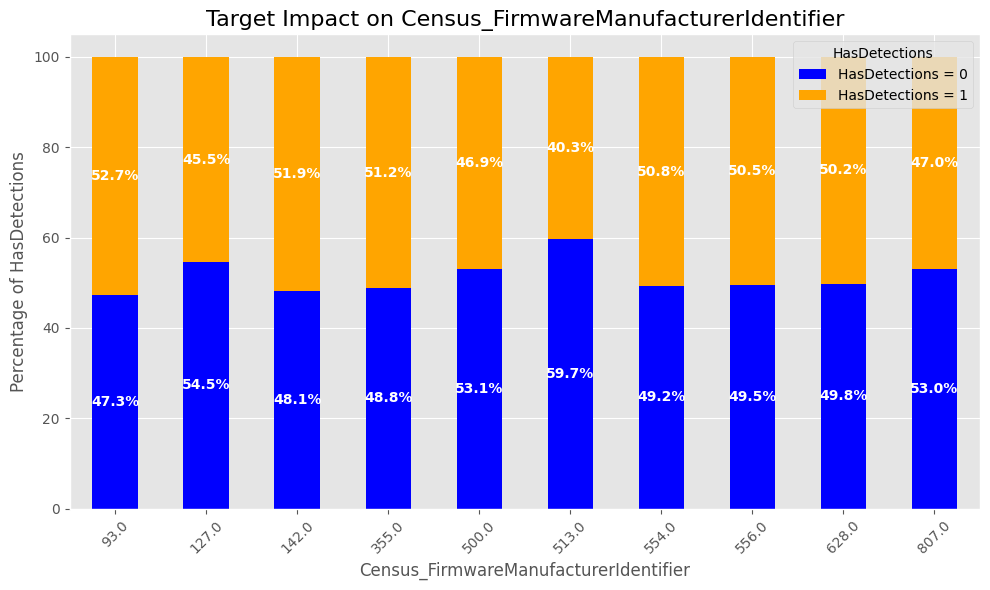

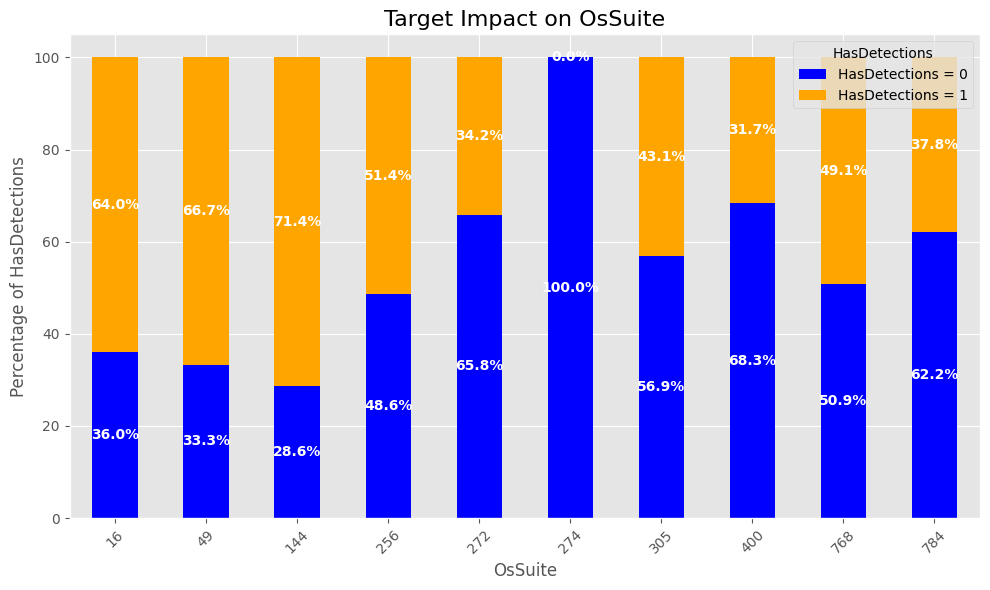

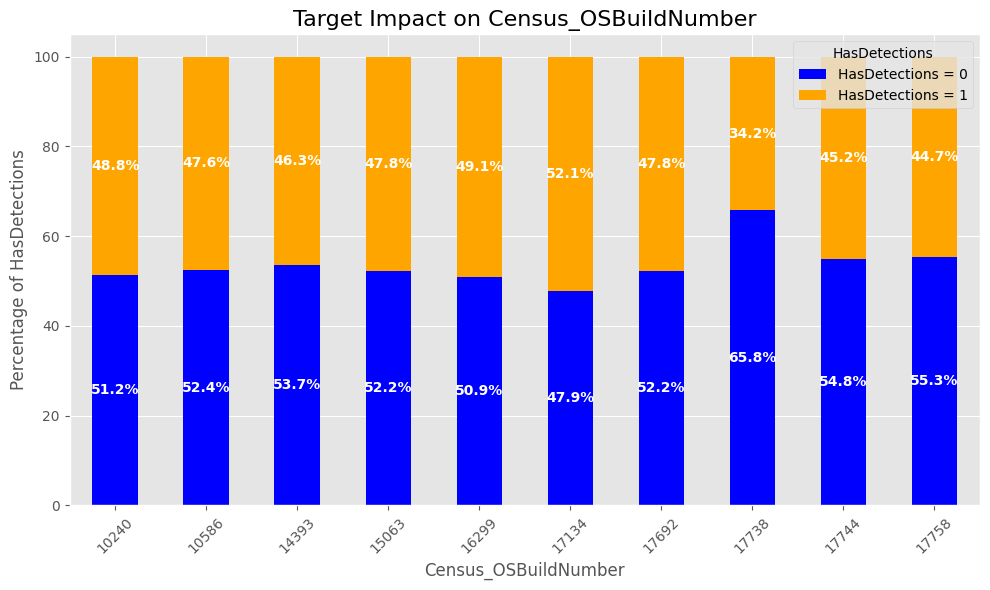

In [20]:
plot_feature_num(train_df[num],'HasDetections',10)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_target_relationships(data, target, n=10):
    """
    Function to visualize relationships between a target variable and the top 'n' highest values 
    of each column in a DataFrame, with a line indicating the highest value.

    Parameters:
    data (pd.DataFrame): DataFrame containing the data.
    target (str): The name of the target column.
    n (int): The number of highest values to plot for numerical columns. Default is 10.

    Returns:
    None: Displays visualizations for each column.
    """
    # Define the target variable
    target_data = data[target]

    # Loop through each column in the DataFrame (except the target column)
    for col in data.columns:
        if col == target:
            continue  # Skip the target column
        
        plt.figure(figsize=(10, 6))
        
        # Check if the column is numerical
        if data[col].dtype in ['int64', 'float64']:
            # Get the top 'n' highest values for the column
            top_n_values = data[[col, target]].nlargest(n, col)

            # Plot the distribution of the top 'n' values vs the target
            sns.histplot(data=top_n_values, x=col, hue=target, kde=True, element='step')
            
            # Find the highest value in the top 'n' values
            max_value = top_n_values[col].max()
            
            # Add a vertical line to indicate the highest value
            plt.axvline(max_value, color='red', linestyle='--', label=f'Highest {col}: {max_value}')
            
            plt.title(f'Top {n} {col} values with respect to {target}')
            plt.legend()
        
        # If the column is categorical
        else:
            # Plot the count for the top 'n' categories if applicable (limit to unique categories)
            sns.countplot(data=data, x=col, hue=target, order=data[col].value_counts().index[:n])
            plt.title(f'Count of top {n} {col} categories with respect to {target}')
        
        plt.tight_layout()
        plt.show()

# Example usage:
# visualize_target_relationships(train_df, 'target_column', n=15)


In [22]:
# visualize_target_relationships(train_df[cat],'HasDetections')

# one_hot_Encoding

In [23]:
#             onhot_Encoding
def one_hot_encoding(train_df):
     categorical_columns = [
       'OsPlatformSubRelease', 'SkuEdition', 'Census_MDC2FormFactor', 
       'Census_PrimaryDiskTypeName', 'Census_OSArchitecture', 'Census_OSBranch', 
       'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 
       'Census_ActivationChannel','Processor','Census_ChassisTypeName','Census_PowerPlatformRoleName']

# Create dummy variables for categorical columns
     train_df = dd.get_dummies(train_df, columns=categorical_columns)
     return train_df

train_df=one_hot_encoding(train_df)



In [24]:
#  from bool to int
train_df[train_df.select_dtypes(include=['bool']).columns] = train_df.select_dtypes(include=['bool']).astype(int)


# Lable_Encoding

In [25]:
 def lable_encoding(train_df):   
    columns_to_encode = [
       'OsBuildLab', 'SmartScreen', 'AppVersion', 'AvSigVersion', 
       'Census_OSVersion',"Census_InternalBatteryNumberOfCharges","EngineVersion"]

# Initialize a LabelEncoder
    label_encoders = {col: LabelEncoder() for col in columns_to_encode}

# Apply label encoding to each specified column
    for col in columns_to_encode:
    # Fit the LabelEncoder and transform the column
        train_df[col] = label_encoders[col].fit_transform(train_df[col])
    return train_df

train_df=lable_encoding(train_df)

In [26]:
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',None)
train_df.head(10)

EngineVersion  AppVersion  AvSigVersion  AVProductStatesIdentifier  \
85497              57          55          7359                    53447.0   
122939             55           6          6719                    61027.0   
4911               57          55          7263                    53447.0   
124740             57          55          7292                    53447.0   
65590              57          55          7435                    47238.0   
106499             57          36          7305                    53447.0   
71619              57          55          7388                     7945.0   
103384             57          55          7527                    53447.0   
92386              57          55          7219                    53447.0   
107767             56          49          6801                    53447.0   

        AVProductsInstalled  AVProductsEnabled  CountryIdentifier  \
85497                   1.0                1.0                214   
122939                  2.0                2.0                158   
4911                    1.0                1.0                179   
124740                  1.0                1.0                 93   
65590                   2.0                1.0                201   
106499                  1.0                1.0                195   
71619                   2.0                1.0                 50   
103384                  1.0                1.0                171   
92386                   1.0                1.0                 93   
107767                  1.0                1.0                 22   

        CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
85497          58607.0                    50.0              287.0   
122939        117594.0                     NaN              202.0   
4911           83348.0                     NaN              234.0   
124740         88087.0                    27.0              119.0   
65590           4999.0                    48.0              267.0   
106499         10222.0                    27.0              276.0   
71619         115292.0                     NaN               68.0   
103384         99787.0                    27.0              211.0   
92386         146087.0                    27.0              277.0   
107767         87917.0                     NaN              276.0   

        LocaleEnglishNameIdentifier  OsBuild  OsSuite  OsBuildLab  SMode  \
85497                            75    17134      768         238    0.0   
122939                           70    14393      768         152    0.0   
4911                            211    17134      256         238    0.0   
124740                           64    17134      256         238    0.0   
65590                           251    16299      768         233    0.0   
106499                           74    16299      768         229    0.0   
71619                            51    14393      768         175    0.0   
103384                          182    16299      768         233    0.0   
92386                            75    16299      768         233    0.0   
107767                           74    17134      768         238    0.0   

        IeVerIdentifier  SmartScreen  Census_OEMNameIdentifier  \
85497             137.0            9                    1443.0   
122939             96.0            9                     585.0   
4911              137.0            9                    1980.0   
124740            137.0           17                    2102.0   
65590             117.0           17                     525.0   
106499            111.0            9                    2668.0   
71619              98.0            9                    2668.0   
103384            117.0            9                     530.0   
92386             117.0            9                    1443.0   
107767            137.0            9                    2668.0   

        Census_OEMModelIdentifier  Census_ProcessorCoreCount  \
8

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500000 entries, 85497 to 71431
Columns: 133 entries, EngineVersion to Census_PowerPlatformRoleName_Workstation
dtypes: float32(24), int16(6), int32(1), int64(97), int8(5)
memory usage: 1.3 GB


In [28]:
# funciont take df and retrun cols has data 0 or 1
def get_binary_columns(df):
    binary_cols = []
    for col in df.columns:
        unique_values = df[col].dropna().unique()
        if set(unique_values).issubset({0, 1}):
            binary_cols.append(col)
    return binary_cols

binary_columns = get_binary_columns(train_df)

print("Columns with only 0 or 1:", binary_columns)
len(binary_columns)


Columns with only 0 or 1: ['SMode', 'Census_HasOpticalDiskDrive', 'Census_IsPortableOperatingSystem', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Wdft_IsGamer', 'HasDetections', 'OsPlatformSubRelease_prers5', 'OsPlatformSubRelease_rs1', 'OsPlatformSubRelease_rs2', 'OsPlatformSubRelease_rs3', 'OsPlatformSubRelease_rs4', 'OsPlatformSubRelease_th1', 'OsPlatformSubRelease_th2', 'OsPlatformSubRelease_windows7', 'OsPlatformSubRelease_windows8.1', 'SkuEdition_Home', 'SkuEdition_Invalid', 'SkuEdition_Pro', 'SkuEdition_other', 'Census_MDC2FormFactor_AllInOne', 'Census_MDC2FormFactor_Convertible', 'Census_MDC2FormFactor_Desktop', 'Census_MDC2FormFactor_Detachable', 'Census_MDC2FormFactor_Notebook', 'Census_MDC2FormFactor_PCOther', 'Census_MDC2FormFactor_other', 'Census_PrimaryDiskTypeName_HDD', 'Census_PrimaryDiskTypeName_SSD', 'Census_PrimaryDiskTypeName_UNKNOWN', 'Census_PrimaryDiskTypeName_Unspecified', 'Census_OSArchitecture_amd64', 'Census_OSArchitecture_arm64', 'Census_OSArchit

97

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500000 entries, 85497 to 71431
Columns: 133 entries, EngineVersion to Census_PowerPlatformRoleName_Workstation
dtypes: float32(24), int16(6), int32(1), int64(97), int8(5)
memory usage: 1.3 GB


In [30]:
# conver from pandas to dask 
train_df = dd.from_pandas(train_df,2)

# full Nulls in nomircal cols has data (0,1) beased on persentage of 0 and 1

In [31]:
import dask.dataframe as dd
import numpy as np
import pandas as pd

def fill_nulls_based_on_existing_values_dask(df, *cols):
    
    
    for col in cols:
        if col in df.columns:
            # Count 0s and 1s in each partition
            value_counts = df[col].value_counts().compute()
            count_0 = value_counts.get(0, 0)
            count_1 = value_counts.get(1, 0)
            total_filled = count_0 + count_1

            if total_filled == 0:
                # If there are no filled rows, fill with either 0 or 1
                df[col] = df[col].fillna(0)  # or fillna(1)
                continue

            # Calculate the percentages
            percentage_0 = count_0 / total_filled
            percentage_1 = count_1 / total_filled

            # Define a function to fill nulls based on calculated probabilities
            def fill_values(partition):
                num_nulls = partition[col].isnull().sum()
                if num_nulls > 0:
                    fill_values = np.random.choice(
                        [0, 1],
                        size=num_nulls,
                        p=[percentage_0, percentage_1]
                    )
                    partition.loc[partition[col].isnull(), col] = fill_values
                return partition

            # Use map_partitions to apply the filling function to each partition
            df = df.map_partitions(fill_values)

    return df

# Assuming you have train_df and binary_columns defined
ddf_filled = fill_nulls_based_on_existing_values_dask(train_df, *binary_columns)

# Trigger computation
final_result = ddf_filled.compute()



In [32]:
train_df=final_result
train_df

EngineVersion  AppVersion  AvSigVersion  AVProductStatesIdentifier  \
0                  56          49          7115                    53447.0   
0                  56          55          6801                    53447.0   
0                  56          55          7206                     7945.0   
0                  56          43          6828                        NaN   
0                  56          55          6894                    53447.0   
...               ...         ...           ...                        ...   
131217             57          28          7547                    41571.0   
131219             56          49          6907                    53447.0   
131219             57          55          7476                    54661.0   
131221             56          55          6862                    53447.0   
131224             56          55          6965                    53447.0   

        AVProductsInstalled  AVProductsEnabled  CountryIdentifier  \
0                       1.0                1.0                 94   
0                       1.0                1.0                205   
0                       2.0                1.0                171   
0                       NaN                NaN                159   
0                       1.0                1.0                 90   
...                     ...                ...                ...   
131217                  2.0                1.0                 66   
131219                  1.0                1.0                160   
131219                  3.0                2.0                 97   
131221                  1.0                1.0                171   
131224                  1.0                1.0                201   

        CityIdentifier  OrganizationIdentifier  GeoNameIdentifier  \
0              43716.0                     NaN              277.0   
0              75528.0                     NaN              274.0   
0              15838.0                    27.0              211.0   
0              70124.0                     NaN              194.0   
0              43491.0                    27.0              123.0   
...                ...                     ...                ...   
131217          2297.0                     NaN               89.0   
131219         85927.0                     NaN              204.0   
131219         50136.0                    27.0              126.0   
131221         74423.0                    18.0              211.0   
131224         66202.0                    27.0              267.0   

        LocaleEnglishNameIdentifier  OsBuild  OsSuite  OsBuildLab  SMode  \
0                                75    17134      256         238    0.0   
0                               182    16299      768         231    0.0   
0                               182    17134      768         238    0.0   
0                                75    17134      768         238    0.0   
0                                66    17134      768         238    0.0   
...                             ...      ...      ...         ...    ...   
131217                           88    17134      256         238    0.0   
131219                          170    16299      768         233    0.0   
131219                          124    17134      768         238    0.0   
131221                          182    16299      768         229    0.0   
131224                          251    17134      768         238    0.0   

        IeVerIdentifier  SmartScreen  Census_OEMNameIdentifier  \
0                 137.0            9                    1443.0   
0                 117.0            9                    5757.0   
0                 137.0           17                    2668.0   
0                 137.0            9                    1443.0   
0                 137.0            5                    2668.0   
...                 ...          ...                       ...   
131217            137.0            9  

In [33]:
# show Nulls 
pd.set_option('display.max_row',None)
nulls=dataframe_summary(train_df)
print(nulls)

                                           Column Name  Null Count  \
0                                        EngineVersion           0   
1                                           AppVersion           0   
2                                         AvSigVersion           0   
3                            AVProductStatesIdentifier        6143   
4                                  AVProductsInstalled        6143   
5                                    AVProductsEnabled        6143   
6                                    CountryIdentifier           0   
7                                       CityIdentifier       54666   
8                               OrganizationIdentifier      462779   
9                                    GeoNameIdentifier          44   
10                         LocaleEnglishNameIdentifier           0   
11                                             OsBuild           0   
12                                             OsSuite           0   
13                  

In [34]:
# cals that has num data not binary(0,1)
cals= list(set(train_df.columns.to_list()) - set(binary_columns))

In [35]:
cals.append("SMode")

In [36]:
cals

['Census_FirmwareVersionIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_OSUILocaleIdentifier',
 'AVProductsEnabled',
 'EngineVersion',
 'Census_OEMNameIdentifier',
 'AvSigVersion',
 'Census_ProcessorModelIdentifier',
 'LocaleEnglishNameIdentifier',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_ProcessorCoreCount',
 'Census_OSVersion',
 'Census_OSInstallLanguageIdentifier',
 'AVProductsInstalled',
 'Census_ProcessorManufacturerIdentifier',
 'CountryIdentifier',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'OsBuildLab',
 'GeoNameIdentifier',
 'Census_OEMModelIdentifier',
 'SmartScreen',
 'CityIdentifier',
 'Wdft_RegionIdentifier',
 'IeVerIdentifier',
 'Census_OSBuildRevision',
 'Census_InternalBatteryNumberOfCharges',
 'OsBuild',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_TotalPhysicalRAM',
 'OrganizationIdentifier',
 'Census_SystemVolumeTotalCapacity',
 'AVProductStatesIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'OsSuite

# full normal nomerical nulls 

In [37]:
import dask.dataframe as dd
import numpy as np

def fill_null_with_median(data: dd.DataFrame, num_cols: list) -> dd.DataFrame:
    """
    Fills null values in the specified columns of the Dask DataFrame with the median of each column.

    Parameters:
        data (dd.DataFrame): The input Dask DataFrame.
        num_cols (list): The list of columns to process.

    Returns:
        dd.DataFrame: The Dask DataFrame with null values filled with median.
    """
    # Ensure only valid columns are processed
    num_cols = [col for col in num_cols if col in data.columns]

    # Fill null values with the median for the specified columns
    for col in num_cols:
        if data[col].dtype in [np.float64, np.int64]:  # Check if the column is numeric
            median_value = data[col].median()  # Compute the median
            data[col] = data[col].fillna(median_value)

    return data



In [38]:
train_df=fill_null_with_median(train_df,cals)

# convert data from int64 to int32 and from float64 to float32

In [39]:
pd.set_option('display.max_row',None)
nulls=dataframe_summary(train_df)
nulls

Column Name  Null Count  \
0                                        EngineVersion           0   
1                                           AppVersion           0   
2                                         AvSigVersion           0   
3                            AVProductStatesIdentifier        6143   
4                                  AVProductsInstalled        6143   
5                                    AVProductsEnabled        6143   
6                                    CountryIdentifier           0   
7                                       CityIdentifier       54666   
8                               OrganizationIdentifier      462779   
9                                    GeoNameIdentifier          44   
10                         LocaleEnglishNameIdentifier           0   
11                                             OsBuild           0   
12                                             OsSuite           0   
13                                          OsBuildLab           0   
14                                               SMode       90444   
15                                     IeVerIdentifier        9909   
16                                         SmartScreen           0   
17                            Census_OEMNameIdentifier       16076   
18                           Census_OEMModelIdentifier       17227   
19                           Census_ProcessorCoreCount        6982   
20              Census_ProcessorManufacturerIdentifier        6983   
21                     Census_ProcessorModelIdentifier        6989   
22                     Census_PrimaryDiskTotalCapacity        8809   
23                    Census_SystemVolumeTotalCapacity        8807   
24                          Census_HasOpticalDiskDrive           0   
25                             Census_TotalPhysicalRAM       13571   
26   Census_InternalPrimaryDiagonalDisplaySizeInInches        7875   
27   Census_InternalPrimaryDisplayResolutionHorizontal        7846   
28     Census_InternalPrimaryDisplayResolutionVertical        7846   
29               Census_InternalBatteryNumberOfCharges           0   
30                                    Census_OSVersion           0   
31                                Census_OSBuildNumber           0   
32                              Census_OSBuildRevision           0   
33                  Census_OSInstallLanguageIdentifier       10230   
34                         Census_OSUILocaleIdentifier           0   
35                    Census_IsPortableOperatingSystem           0   
36               Census_FirmwareManufacturerIdentifier       30889   
37                    Census_FirmwareVersionIdentifier       27033   
38                          Census_IsSecureBootEnabled           0   
39                               Census_IsTouchEnabled           0   
40                                        Wdft_IsGamer           0   
41                               Wdft_RegionIdentifier       50885   
42                                       HasDetections           0   
43                         OsPlatformSubRelease_prers5           0   
44                            OsPlatformSubRelease_rs1           0   
45                            OsPlatformSubRelease_rs2           0   
46                            OsPlatformSubRelease_rs3           0   
47                            OsPlatformSubRelease_rs4           0   
48                            OsPlatformSubRelease_th1           0   
49                            OsPlatformSubRelease_th2           0   
50                       OsPlatformSubRelease_windows7           0   
51                     OsPlatformSubRelease_windows8.1           0   
52                                     SkuEdition_Home           0   
53                                  SkuEdition_Invalid           0   
54                                      SkuEdition_Pro           0   
55                                    SkuEdition_other           0   
56                      Census_MDC2FormFactor_AllInOn

In [40]:
train_df.head(20)

EngineVersion  AppVersion  AvSigVersion  AVProductStatesIdentifier  \
0             56          49          7115                    53447.0   
0             56          55          6801                    53447.0   
0             56          55          7206                     7945.0   
0             56          43          6828                        NaN   
0             56          55          6894                    53447.0   
0             57          55          7366                    53447.0   
0             56          55          6966                    53447.0   
0             57          55          7568                    53447.0   
0             57          19          7480                    53447.0   
0             57          55          7497                    53447.0   
0             57          55          7364                    53447.0   
0             46          25          5504                    53447.0   
0             56          55          7178                    53447.0   
0             56          19          7091                    53447.0   
0             56          25          7071                    40431.0   
0             55           6          6617                    53447.0   
0             56          13          7046                    53447.0   
0             56          55          6933                    53447.0   
1             51          19          5941                    47238.0   
1             56          49          7106                     7945.0   

   AVProductsInstalled  AVProductsEnabled  CountryIdentifier  CityIdentifier  \
0                  1.0                1.0                 94         43716.0   
0                  1.0                1.0                205         75528.0   
0                  2.0                1.0                171         15838.0   
0                  NaN                NaN                159         70124.0   
0                  1.0                1.0                 90         43491.0   
0                  1.0                1.0                101         75555.0   
0                  1.0                1.0                 35         11098.0   
0                  1.0                1.0                 91         98651.0   
0                  1.0                1.0                 81         56441.0   
0                  1.0                1.0                 51         40629.0   
0                  1.0                1.0                141        156098.0   
0                  1.0                1.0                214         58607.0   
0                  1.0                1.0                 12        142656.0   
0                  1.0                1.0                 93         57128.0   
0                  2.0                1.0                 41         32657.0   
0                  1.0                1.0                147        141752.0   
0                  1.0                1.0                 89        142110.0   
0                  1.0                1.0                170         12809.0   
1                  2.0                1.0                164         24859.0   
1                  2.0                1.0                160        159247.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                     NaN              277.0                           75   
0                     NaN              274.0                          182   
0                    27.0              211.0                          182   
0                     NaN              194.0                           75   
0                    27.0              123.0                           66   
0                    27.0              129.0                          126   
0                    27.0              277.0                           75   
0                    27.0              277.0                           75   
0                    18.0              277.0                          235   
0                 

In [41]:
# import pandas as pd

# # Assuming `df` is your cleaned DataFrame
# # For example:
# # df = pd.DataFrame(cleaned_data)

# # Save the cleaned DataFrame to a CSV file
# output_file_path = '/kaggle/working/cleaned_data.csv'  # This path is accessible
# train_df.to_csv(output_file_path, index=False)

# print(f"CSV file has been created successfully at: {output_file_path}")


# corrolation


In [42]:
import pandas as pd

def remove_highly_correlated_features(data, target_col, correlation_threshold=0.8):
    """
    Remove features that are highly correlated with the target variable.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the dataset.
    - target_col (str): The name of the target column.
    - correlation_threshold (float): The threshold above which features will be removed. Default is 0.8.

    Returns:
    - pd.DataFrame: A DataFrame with highly correlated features removed.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr()
    
    # Get the absolute correlation values with respect to the target column
    target_correlations = correlation_matrix[target_col].abs()
    
    # Identify features to remove (those with correlation higher than the threshold)
    features_to_remove = target_correlations[target_correlations > correlation_threshold].index.tolist()
    print(features_to_remove)
    
    # Remove the target column from the list of features to remove
    features_to_remove.remove(target_col)
    
    # Remove the highly correlated features from the DataFrame
    reduced_data = data.drop(columns=features_to_remove)

    print(f"Removed features: {features_to_remove}")
    return reduced_data

# Example usage:
# reduced_df = remove_highly_correlated_features(train_df, 'HasDetections', correlation_threshold=0.8)


In [43]:
# train_df_df = remove_highly_correlated_features(train_df, 'HasDetections', correlation_threshold=0.9)
# # 

# PCA

In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_pca_on_categories(data, categories):
    """
    Perform PCA on specified feature categories and return a DataFrame
    with PCA results and 'HasDetections' column.

    Parameters:
    data (pd.DataFrame): The original dataset.
    categories (dict): A dictionary where keys are category names 
                       and values are lists of feature column names.

    Returns:
    pd.DataFrame: DataFrame containing PCA results and 'HasDetections'.
    """
    # Initialize an empty DataFrame for results
    pca_results = pd.DataFrame()

    # Perform PCA for each category
    for cat, features in categories.items():
        # Check if features exist in the dataset
        existing_features = [feature for feature in features if feature in data.columns]
        if existing_features:
            # Standardize the data
            scaler = StandardScaler()
            scaled_data = scaler.fit_transform(data[existing_features])

            # Apply PCA
            pca = PCA(n_components=1)  # Keep only the first principal component
            principal_component = pca.fit_transform(scaled_data)

            # Create a DataFrame with PCA result and add category name
            pca_df = pd.DataFrame(principal_component, columns=[f'{cat}_PCA'])
            pca_results = pd.concat([pca_results, pca_df], axis=1)
        else:
            print(f"No features found for category: {cat}")

    # Combine PCA results with 'HasDetections' column
#     if 'HasDetections' in data.columns:
#         final_result = pd.concat([pca_results, data[['HasDetections']]], axis=1)
#     else:
#         print("'HasDetections' column not found in the dataset.")
#         final_result = pca_results

    return pca_results

# Example usage:
if __name__ == "__main__":
    # Load the original dataset
   
    # Define the columns for each category
    categories = {
           'Hardware_Processor': [
            'Census_ProcessorModelIdentifier', 
            'Census_ProcessorManufacturerIdentifier', 
            'Census_ProcessorCoreCount'
        ],
          'Hardware_Storage': [
            'Census_SystemVolumeTotalCapacity', 
            'Census_PrimaryDiskTotalCapacity'
        ],
        'Hardware_Memory': [
            'Census_TotalPhysicalRAM'
        ],
        'Hardware_Display': [
            'Census_InternalPrimaryDiagonalDisplaySizeInInches', 
            'Census_InternalPrimaryDisplayResolutionVertical', 
            'Census_InternalPrimaryDisplayResolutionHorizontal'
        ],
        'hardware_battery' : [
           'Census_InternalBatteryNumberOfCharges'
        ],

        "hardware_optical_drive" : [
        'Census_HasOpticalDiskDrive'
        ],

       ' hardware_chassis' : [
        'Census_ChassisTypeName_Desktop',
        'Census_ChassisTypeName_Laptop',
        'Census_ChassisTypeName_Notebook',
        'Census_ChassisTypeName_Portable',
        'Census_ChassisTypeName_other'
        ],

# Operating System
        'os_version' : [
        'Census_OSVersion', 
        'Census_OSBuildNumber', 
        'Census_OSBuildRevision', 
        'Census_OSBranch_other'
        ],

        'os_install' : [
        'Census_OSInstallLanguageIdentifier', 
        'Census_OSUILocaleIdentifier', 
        'Census_OSInstallTypeName_Clean', 
        'Census_OSInstallTypeName_Upgrade'
        ],

        'os_architecture' : [
        'Census_OSArchitecture_amd64', 
        'Census_OSArchitecture_arm64', 
        'Census_OSArchitecture_x86'
        ],

        'os_edition' : [
        'Census_OSEdition_Core', 
        'Census_OSEdition_Professional', 
        'Census_OSSkuName_CORE', 
        'Census_OSSkuName_PROFESSIONAL'
        ],

        'os_update' : [
        'Census_OSWUAutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime'
        ],

# Outside
        'outside_data' : [
        'GeoNameIdentifier', 
            'OrganizationIdentifier', 
        'CityIdentifier', 
        'CountryIdentifier',
        'LocaleEnglishNameIdentifier', 
        'Wdft_RegionIdentifier'
        ],

# Software
        'software' : [
        'AvSigVersion', 
        'EngineVersion', 
        'AppVersion', 
        'OsBuildLab', 
        'Census_FirmwareVersionIdentifier', 
        'Census_OEMNameIdentifier', 
        'Census_OEMModelIdentifier', 
        'Census_FirmwareManufacturerIdentifier'
        ],

# Antivirus
        'antivirus' : [
        'AVProductsInstalled', 
        'AVProductStatesIdentifier', 
        'AVProductsEnabled'
        ],

# Boot and Power
        "boot_power" : [
        'SMode', 
        'Census_IsPortableOperatingSystem', 
        'Census_IsSecureBootEnabled'
        ],

# Network
        'network' : [
            'Census_PowerPlatformRoleName_AppliancePC', 
            'Census_PowerPlatformRoleName_Desktop', 
            'Census_PowerPlatformRoleName_EnterpriseServer', 
            'Census_PowerPlatformRoleName_Mobile'
        ],

# User Behavior
        'user_behavior' : [
            'Wdft_IsGamer', 
            'SmartScreen'
        ],

# Other
        'other' : [
        'IeVerIdentifier', 
        'Processor_arm64', 
        'Processor_x64', 
        'Processor_x86'
        ],
        "HasDetections":["HasDetections"]
        # Add other categories here...
    }

#     # Perform PCA
#     pca_results = perform_pca_on_categories(train_df, categories)

#     # Display the final DataFrame
#     pca_results.head()


# noralization and Shapiro test 
## not important and not give high effet and take alot of time

In [45]:
# import dask.dataframe as dd
# import pandas as pd
# from scipy.stats import shapiro
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# def automatic_scaling(dask_df, columns_to_scale):
#     def shapiro_test(series):
#         stat, p_value = shapiro(series)
#         return p_value

#     # Compute p-values for the specified numeric columns
#     # Here, we use meta argument to define the expected output type
#     p_values = dask_df[columns_to_scale].apply(lambda df: df.apply(shapiro_test)).compute()

#     # Determine scaling method for each column based on its p-value
#     scaling_methods = {}
#     for column, p_value in zip(columns_to_scale, p_values):
#         if p_value > 0.05:
#             scaling_methods[column] = 'minmax'  # Use Min-Max Scaling
#         else:
#             scaling_methods[column] = 'standard'  # Use Standardization

#     # Fit scalers and store them for later use
#     scalers = {}
#     for column, method in scaling_methods.items():
#         if method == 'minmax':
#             scaler = MinMaxScaler()
#         else:
#             scaler = StandardScaler()
#         # Fit scaler on the entire column first before scaling
#         scalers[column] = scaler.fit(dask_df[[column]].compute())

#     # Function to scale data based on determined methods
#     def scale_data(df):
#         for column, method in scaling_methods.items():
#             if method == 'minmax':
#                 df[column] = scalers[column].transform(df[[column]])
#             else:
#                 df[column] = scalers[column].transform(df[[column]])
#         return df

#     # Apply scaling only to specified columns
#     scaled_df = dask_df.apply(scale_data)

#     return scaled_df


In [46]:
pd.set_option('display.max_column',None)
train_df.head(10)

EngineVersion  AppVersion  AvSigVersion  AVProductStatesIdentifier  \
0             56          49          7115                    53447.0   
0             56          55          6801                    53447.0   
0             56          55          7206                     7945.0   
0             56          43          6828                        NaN   
0             56          55          6894                    53447.0   
0             57          55          7366                    53447.0   
0             56          55          6966                    53447.0   
0             57          55          7568                    53447.0   
0             57          19          7480                    53447.0   
0             57          55          7497                    53447.0   

   AVProductsInstalled  AVProductsEnabled  CountryIdentifier  CityIdentifier  \
0                  1.0                1.0                 94         43716.0   
0                  1.0                1.0                205         75528.0   
0                  2.0                1.0                171         15838.0   
0                  NaN                NaN                159         70124.0   
0                  1.0                1.0                 90         43491.0   
0                  1.0                1.0                101         75555.0   
0                  1.0                1.0                 35         11098.0   
0                  1.0                1.0                 91         98651.0   
0                  1.0                1.0                 81         56441.0   
0                  1.0                1.0                 51         40629.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                     NaN              277.0                           75   
0                     NaN              274.0                          182   
0                    27.0              211.0                          182   
0                     NaN              194.0                           75   
0                    27.0              123.0                           66   
0                    27.0              129.0                          126   
0                    27.0              277.0                           75   
0                    27.0              277.0                           75   
0                    18.0              277.0                          235   
0                    46.0               98.0                          103   

   OsBuild  OsSuite  OsBuildLab  SMode  IeVerIdentifier  SmartScreen  \
0    17134      256         238    0.0            137.0            9   
0    16299      768         231    0.0            117.0            9   
0    17134      768         238    0.0            137.0           17   
0    17134      768         238    0.0            137.0            9   
0    17134      768         238    0.0            137.0            5   
0    17134      768         238    0.0            137.0           17   
0    16299      768         229    0.0            117.0            9   
0    17134      768         238    0.0            137.0            9   
0    16299      256         229    0.0            111.0            5   
0    17134      768         238    0.0            137.0           17   

   Census_OEMNameIdentifier  Census_OEMModelIdentifier  \
0                    1443.0                   256580.0   
0                    5757.0                   328673.0   
0                    2668.0                   171208.0   
0                    1443.0                   256499.0   
0                    2668.0                   170875.0   
0                    1980.0                   333203.0   
0                    4589.0                   313586.0   
0                    4589.0                   313586.0   
0                    2102.0                   250503.0   
0                     525.0                   331434.0   

   Census_ProcessorCoreCount  Census_P

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500000 entries, 0 to 131224
Columns: 133 entries, EngineVersion to Census_PowerPlatformRoleName_Workstation
dtypes: float32(24), int16(6), int32(1), int64(97), int8(5)
memory usage: 1.3 GB


# handleing outliers use IQR 

In [48]:
columns=train_df.columns
def handle_outliers(df, columns):
    for column in columns:
        if df[column].dtype in [int, float]:  
        
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Determine outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

train_df = handle_outliers(train_df,cals)

In [49]:
train_df.head()

EngineVersion  AppVersion  AvSigVersion  AVProductStatesIdentifier  \
0           56.0          49        7115.0                    53447.0   
0           56.0          55        6801.0                    53447.0   
0           56.0          55        7206.0                     7945.0   
0           56.0          43        6828.0                        NaN   
0           56.0          55        6894.0                    53447.0   

   AVProductsInstalled  AVProductsEnabled  CountryIdentifier  CityIdentifier  \
0                  1.0                1.0                 94         43716.0   
0                  1.0                1.0                205         75528.0   
0                  2.0                1.0                171         15838.0   
0                  NaN                NaN                159         70124.0   
0                  1.0                1.0                 90         43491.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                     NaN              277.0                           75   
0                     NaN              274.0                          182   
0                    27.0              211.0                          182   
0                     NaN              194.0                           75   
0                    27.0              123.0                           66   

   OsBuild  OsSuite  OsBuildLab  SMode  IeVerIdentifier  SmartScreen  \
0    17134      256       238.0    0.0            137.0            9   
0    16299      768       231.0    0.0            117.0            9   
0    17134      768       238.0    0.0            137.0           17   
0    17134      768       238.0    0.0            137.0            9   
0    17134      768       238.0    0.0            137.0            5   

   Census_OEMNameIdentifier  Census_OEMModelIdentifier  \
0                    1443.0                   256580.0   
0                    5757.0                   328673.0   
0                    2668.0                   171208.0   
0                    1443.0                   256499.0   
0                    2668.0                   170875.0   

   Census_ProcessorCoreCount  Census_ProcessorManufacturerIdentifier  \
0                        4.0                                     5.0   
0                        4.0                                     5.0   
0                        4.0                                     5.0   
0                        4.0                                     5.0   
0                        4.0                                     5.0   

   Census_ProcessorModelIdentifier  Census_PrimaryDiskTotalCapacity  \
0                           2293.0                         476940.0   
0                           1850.0                          29600.0   
0                           2660.0                         476940.0   
0                           2998.0                         953869.0   
0                           2373.0                         953869.0   

   Census_SystemVolumeTotalCapacity  Census_HasOpticalDiskDrive  \
0                          116999.0                           0   
0                           28682.0                           0   
0                          153700.0                           0   
0                          943471.0                           0   
0                          908086.0                           0   

   Census_TotalPhysicalRAM  Census_InternalPrimaryDiagonalDisplaySizeInInches  \
0                   4096.0                                          15.500000   
0                   1024.0                                           8.000000   
0                   4096.0                                          15.900000   
0                  16384.0                                          17.299999   
0                   8192.0                                          15.500000   

   Census_InternalPrimaryDisplayResolutionHorizontal  \
0                               

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500000 entries, 0 to 131224
Columns: 133 entries, EngineVersion to Census_PowerPlatformRoleName_Workstation
dtypes: float32(24), float64(4), int16(6), int32(1), int64(93), int8(5)
memory usage: 1.3 GB


# Tensorflow

# Catboost

In [51]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_catboost_classifier(df, target_column):
    # Split the data into features (X) and target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the CatBoost classifier
    model = CatBoostClassifier(verbose=0)  # verbose=0 to suppress training output
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate other evaluation metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Get the confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    
    # Get a detailed classification report
    class_report = classification_report(y_test, y_pred)
    
    # Print the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion)
    print("\nClassification Report:")
    print(class_report)
    
    # Return the metrics as a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': confusion,
        'classification_report': class_report
    }

# Example usage:
# df is your DataFrame, and 'target_column' is the name of your target column
# metrics = evaluate_catboost_classifier(df, 'target_column')


In [53]:
evaluate_catboost_classifier(train_df,"HasDetections")

Accuracy: 0.6612
Precision: 0.6613
Recall: 0.6612
F1-Score: 0.6611

Confusion Matrix:
[[151063  73664]
 [ 78801 146472]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66    224727
           1       0.67      0.65      0.66    225273

    accuracy                           0.66    450000
   macro avg       0.66      0.66      0.66    450000
weighted avg       0.66      0.66      0.66    450000



{'accuracy': 0.6611888888888889,
 'precision': 0.6612823394823858,
 'recall': 0.6611888888888889,
 'f1_score': 0.6611494254723693,
 'confusion_matrix': array([[151063,  73664],
        [ 78801, 146472]]),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.66      0.67      0.66    224727\n           1       0.67      0.65      0.66    225273\n\n    accuracy                           0.66    450000\n   macro avg       0.66      0.66      0.66    450000\nweighted avg       0.66      0.66      0.66    450000\n'}

# Randomforst

# XGBoost

In [54]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_xgboost_model(df, target_column):
    # Separate features and target
    X = df
    y =train_df['HasDetections']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the XGBoost model
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [55]:
evaluate_xgboost_model(train_df,'HasDetections')

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149916
           1       1.00      1.00      1.00    150084

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

Confusion Matrix:
[[149916      0]
 [     0 150084]]


# LightGBM modele

In [56]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

def clean_feature_names(df):
    """Replace special characters in DataFrame columns."""
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)  # Replace non-alphanumeric characters
    return df

def train_lightgbm_classification(data, target_column, params=None):
    """
    Train a LightGBM classification model and evaluate its performance.
    
    Parameters:
    - data: DataFrame containing the features and target variable.
    - target_column: The name of the target variable column.
    - params: Dictionary of parameters for LightGBM. If None, default parameters will be used.

    Returns:
    - model: Trained LightGBM model.
    - metrics: Dictionary containing evaluation metrics.
    """
    # Clean the feature names
    data = clean_feature_names(data)

    # Split the data into features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Set default parameters if none provided
    if params is None:
        params = {
            'objective': 'binary',  # Change to 'multiclass' if you have more than two classes
            'metric': 'binary_logloss',
            'learning_rate': 0.1,
            'num_leaves': 31,
            'n_estimators': 100,
            'verbose': -1
        }

    # Create and train the LightGBM model
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store metrics in a dictionary
    metrics = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
    }

    # Print evaluation metrics
    for key, value in metrics.items():
        print(f"{key}: {value}")

    return model, metrics

# Example usage:
# df = pd.read_csv('your_dataset.csv')
# model, evaluation_metrics = train_lightgbm_classification(df, 'target_column_name', params={'learning_rate': 0.05, 'n_estimators': 150})


In [57]:
train_lightgbm_classification(train_df,'HasDetections')

Accuracy: 0.6520466666666667
F1 Score: 0.6520139521141031
Precision: 0.6521111558562713
Recall: 0.6520466666666667
Confusion Matrix: [[99220 50696]
 [53690 96394]]


(LGBMClassifier(metric='binary_logloss', objective='binary', verbose=-1),
 {'Accuracy': 0.6520466666666667,
  'F1 Score': 0.6520139521141031,
  'Precision': 0.6521111558562713,
  'Recall': 0.6520466666666667,
  'Confusion Matrix': array([[99220, 50696],
         [53690, 96394]])})

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib 

def xgboost_with_params(df, target_column, learning_rate, balance_weight=True):
    # Split the data into features (X) and target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Handle class imbalance by calculating scale_pos_weight if needed
    if balance_weight:
        classes = y_train.value_counts()
        majority_class = classes.max()
        minority_class = classes.min()
        scale_pos_weight = majority_class / minority_class
    else:
        scale_pos_weight = 1  # Default, no imbalance handling

    # Define the XGBoost model with provided learning rate and scale_pos_weight
    xgb = XGBClassifier(learning_rate=learning_rate, scale_pos_weight=scale_pos_weight)

    # Train the model
    xgb.fit(X_train, y_train)

    # Predict on the test data
    y_pred = xgb.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Print confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    
    #joblib.dump(xgb, model_filename)  # Use joblib to save the model
    # Alternatively, you can use:
    # import pickle
    # with open(model_filename, 'wb') as f:
    #     pickle.dump(xgbr, f)

    # Predict on the entire dataset
    predictions = xgb.predict(X)

    # Evaluate the model on the test data
    y_pred = xgb.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")

    return xgb

# Example usage:
# Assuming 'df' is your DataFrame and 'target_column' is your target variable
# xgboost_with_params(df, 'target_column', learning_rate=0.1, balance_weight=True)


In [59]:
xgboost_with_params(train_df, 'HasDetections', learning_rate=0.5, balance_weight=True)


Accuracy: 65.66%

Confusion Matrix:
[[99264 50652]
 [52363 97721]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.66      0.66    149916
           1       0.66      0.65      0.65    150084

    accuracy                           0.66    300000
   macro avg       0.66      0.66      0.66    300000
weighted avg       0.66      0.66      0.66    300000

Mean Squared Error (MSE): 0.3434
Mean Absolute Error (MAE): 0.3434
R2 Score: -0.3735


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Decision Tree Classifier

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

def clean_feature_names(df):
    """Replace special characters in DataFrame columns."""
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)  # Replace non-alphanumeric characters
    return df

def train_decision_tree_classification(data, target_column, params=None):
    """
    Train a Decision Tree classification model and evaluate its performance.
    
    Parameters:
    - data: DataFrame containing the features and target variable.
    - target_column: The name of the target variable column.
    - params: Dictionary of parameters for Decision Tree. If None, default parameters will be used.

    Returns:
    - model: Trained Decision Tree model.
    - metrics: Dictionary containing evaluation metrics.
    """
    # Clean the feature names
    data = clean_feature_names(data)

    # Split the data into features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Set default parameters if none provided
    if params is None:
        params = {
            'device': 'cpu', 
        "objective": "binary",
        "boosting_type": "gbdt", 
        "learning_rate": 0.03,
        "max_depth": 11,
        "num_leaves": 31,
        "n_estimators": 1000,
        "bagging_fraction": 0.7,
        "feature_fraction": 0.7,
        "bagging_freq": 5,
        "bagging_seed": 2018,
        'min_child_samples': 80, 
        'min_child_weight': 100.0, 
        'min_split_gain': 0.1, 
        'reg_alpha': 0.005, 
        'reg_lambda': 0.1, 
        'subsample_for_bin': 25000, 
        'min_data_per_group': 100, 
        'max_cat_to_onehot': 4, 
        'cat_l2': 25.0, 
        'cat_smooth': 2.0, 
        'max_cat_threshold': 32, 
        "random_state": 1,
        "silent": True,
        "metric": "auc",
            }

    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store metrics in a dictionary
    metrics = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix
    }

    # Print evaluation metrics
    for key, value in metrics.items():
        print(f"{key}: {value}")

    return model, metrics


In [61]:
# train_decision_tree_classification(train_df, 'HasDetections')